 just me and my thoughts and explorations 
 
 ## Imports


In [42]:
# display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# machine learning libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


#data-handling libraries
import numpy as np
import pandas as pd
from itertools import product

%autosave 300

Autosaving every 300 seconds


# <span style="color:blue"> General Background Discussion </span>


## `keras.Sequential`
 `keras.Sequential`, which creates a neural network as a stack of layers
 With the first argument, `units`, we define how many outputs we want
 `input_shape`, we tell Keras the dimensions of the inputs
 
## Netural Networks
 Neural networks typically organize their neurons into layers.
 When we collect together linear units having a common set of inputs we get a *dense* layer.
 An activation function is simply some function we apply to each of a layer's outputs (its activations). The most common is the rectifier function  max(0,x)
 When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes max(0, w * x + b)
the layers before the output layer are sometimes called hidden since we never see their outputs directly

# The Project: predicting fuel economy

In this notebook, we'll predict the fuel economy of an automobile given features like its type of engine or the year it was made ultising the Fuel Economy dataset, with the intent of exploring the effects of changes the parameters when using Stochastic Gradient Descent

In [45]:
# file and data setup
file_path = 'fuel.csv'
fuel_data = pd.read_csv(file_path)
X=fuel_data.copy()
y=X.pop('FE')
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)
X = preprocessor.fit_transform(X)
y = np.log(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)
input_shape=[X_train.shape[1]]
print(X_train.shape)

(830, 50)


In [3]:
# a view of the original data
fuel_data.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [4]:
# the model used
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [75]:
# compling the model
model.compile(
    optimizer='adam',
    loss ='mae',
)

In [79]:
# fit model
history = model.fit(
    X,y,
    batch_size=128,
    epochs = 200,
)
print(history)

Epoch 1/200
1107/1107 [==============================] - 0s 259us/sample - loss: 0.0361
Epoch 2/200
1107/1107 [==============================] - 0s 273us/sample - loss: 0.0320
Epoch 3/200
1107/1107 [==============================] - 0s 211us/sample - loss: 0.0318
Epoch 4/200
1107/1107 [==============================] - 0s 296us/sample - loss: 0.0295
Epoch 5/200
1107/1107 [==============================] - 0s 186us/sample - loss: 0.0279
Epoch 6/200
1107/1107 [==============================] - 0s 260us/sample - loss: 0.0286
Epoch 7/200
1107/1107 [==============================] - 1s 547us/sample - loss: 0.0317
Epoch 8/200
1107/1107 [==============================] - 0s 379us/sample - loss: 0.0340
Epoch 9/200
1107/1107 [==============================] - 0s 206us/sample - loss: 0.0331
Epoch 10/200
1107/1107 [==============================] - 0s 159us/sample - loss: 0.0301
Epoch 11/200
1107/1107 [==============================] - 0s 180us/sample - loss: 0.0260
Epoch 12/200
1107/1107 [======

Epoch 93/200
1107/1107 [==============================] - 0s 149us/sample - loss: 0.0227
Epoch 94/200
1107/1107 [==============================] - 0s 182us/sample - loss: 0.0242
Epoch 95/200
1107/1107 [==============================] - 0s 203us/sample - loss: 0.0223
Epoch 96/200
1107/1107 [==============================] - 0s 164us/sample - loss: 0.0217
Epoch 97/200
1107/1107 [==============================] - 0s 184us/sample - loss: 0.0234
Epoch 98/200
1107/1107 [==============================] - 0s 129us/sample - loss: 0.0273
Epoch 99/200
1107/1107 [==============================] - 0s 149us/sample - loss: 0.0243
Epoch 100/200
1107/1107 [==============================] - 0s 109us/sample - loss: 0.0242
Epoch 101/200
1107/1107 [==============================] - 0s 175us/sample - loss: 0.0260
Epoch 102/200
1107/1107 [==============================] - 0s 158us/sample - loss: 0.0245
Epoch 103/200
1107/1107 [==============================] - 0s 172us/sample - loss: 0.0212
Epoch 104/200
110

1107/1107 [==============================] - 0s 214us/sample - loss: 0.0214
Epoch 184/200
1107/1107 [==============================] - 0s 158us/sample - loss: 0.0235
Epoch 185/200
1107/1107 [==============================] - 0s 108us/sample - loss: 0.0267
Epoch 186/200
1107/1107 [==============================] - 0s 147us/sample - loss: 0.0268
Epoch 187/200
1107/1107 [==============================] - 0s 160us/sample - loss: 0.0239
Epoch 188/200
1107/1107 [==============================] - 0s 121us/sample - loss: 0.0225
Epoch 189/200
1107/1107 [==============================] - 0s 155us/sample - loss: 0.0227
Epoch 190/200
1107/1107 [==============================] - 0s 161us/sample - loss: 0.0236
Epoch 191/200
1107/1107 [==============================] - 0s 164us/sample - loss: 0.0220
Epoch 192/200
1107/1107 [==============================] - 0s 145us/sample - loss: 0.0221
Epoch 193/200
1107/1107 [==============================] - 0s 110us/sample - loss: 0.0319
Epoch 194/200
1107/1107 

<AxesSubplot:>

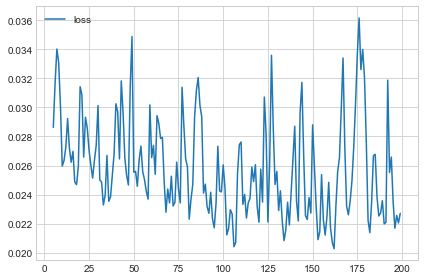

In [82]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()

C:\Users\tofun\AppData\Local\Continuum\anaconda3\envs\TensorFlowEnv\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


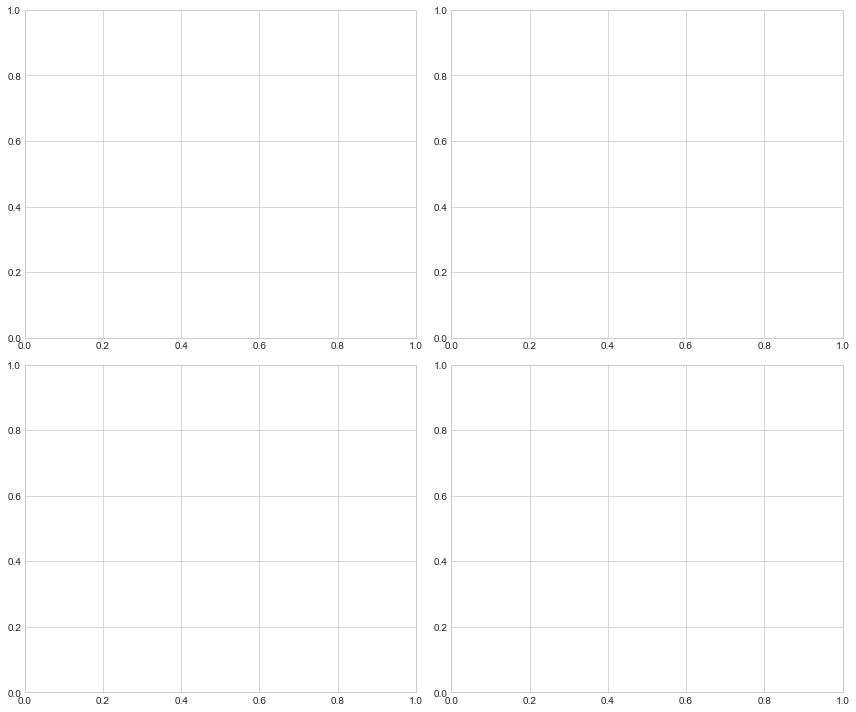

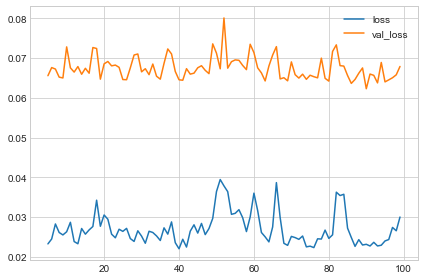

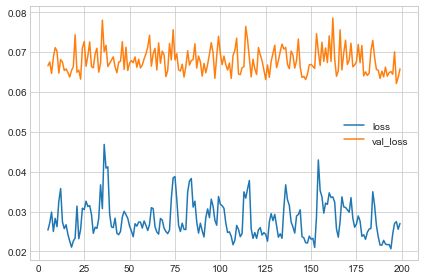

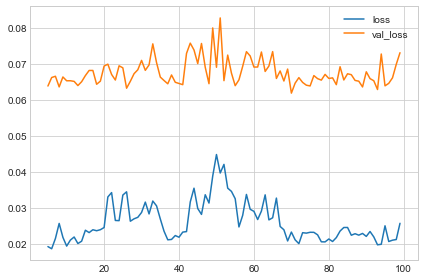

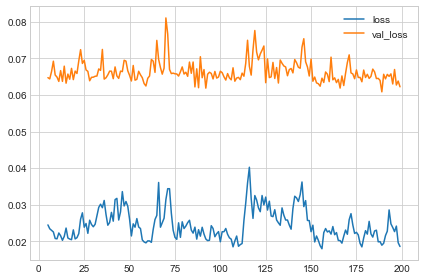

In [66]:
def plotModels(batch_sizes,epochs,start_epoch=5):
    fig, ax = plt.subplots(len(batch_sizes),len(epochs), figsize=(12,10))
    for i in range(len(batch_sizes)):
        for j in range(len(epochs)):
            history = model.fit(
                X_train,y_train,
                batch_size=batch_sizes[i],
                validation_data=(X_val, y_val),
                epochs = epochs[j],
                verbose=0
            )
            history_df = pd.DataFrame(history.history)
            ax[i][j] = history_df.loc[start_epoch:, ['loss','val_loss']].plot()
    fig.tight_layout()
    fig.show()
plotModels([128,256],[100,200])

In [51]:
#We can use a grid search to find the best parameters for this model. Lets try

#Define a list of parameters for the models
params = {'batch_size': [64, 128, 256],
          'epochs': [50, 100, 150, 200]}

#We can build Grid Search model using the above parameters. 
#cv=5 means cross validation with 5 folds
def create_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(128, activation='relu'),    
        layers.Dense(64, activation='relu'),
        layers.Dense(1),
    ])
    model.compile(
        optimizer='adam',
        loss ='mae',
        metrics=['accuracy']
    )
    return model
model3 = KerasClassifier(build_fn=create_model)

grid_search = GridSearchCV(estimator=model3,param_grid=params,n_jobs=1, scoring = 'neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


Epoch 1/50
664/664 [==============================] - 2s 3ms/sample - loss: 216.3687 - acc: 0.0000e+00
Epoch 2/50
664/664 [==============================] - 0s 338us/sample - loss: 212.8685 - acc: 0.0015
Epoch 3/50
664/664 [==============================] - 0s 386us/sample - loss: 203.8738 - acc: 0.0015
Epoch 4/50
664/664 [==============================] - 0s 371us/sample - loss: 183.3609 - acc: 0.0015
Epoch 5/50
664/664 [==============================] - 0s 375us/sample - loss: 144.6035 - acc: 0.0015
Epoch 6/50
664/664 [==============================] - 0s 367us/sample - loss: 91.6740 - acc: 0.0015
Epoch 7/50
664/664 [==============================] - 0s 284us/sample - loss: 62.9313 - acc: 0.0015
Epoch 8/50
664/664 [==============================] - 1s 1ms/sample - loss: 48.7480 - acc: 0.0015
Epoch 9/50
664/664 [==============================] - 0s 539us/sample - loss: 43.0857 - acc: 0.0015
Epoch 10/50
664/664 [==============================] - 0s 503us/sample - loss: 40.4133 - acc: 0

664/664 [==============================] - 0s 262us/sample - loss: 23.7310 - acc: 0.0015
Epoch 31/50
664/664 [==============================] - 0s 222us/sample - loss: 23.5701 - acc: 0.0015
Epoch 32/50
664/664 [==============================] - 0s 227us/sample - loss: 23.2515 - acc: 0.0015
Epoch 33/50
664/664 [==============================] - 0s 267us/sample - loss: 23.0320 - acc: 0.0015
Epoch 34/50
664/664 [==============================] - 0s 436us/sample - loss: 22.8098 - acc: 0.0015
Epoch 35/50
664/664 [==============================] - 0s 333us/sample - loss: 22.8458 - acc: 0.0030
Epoch 36/50
664/664 [==============================] - 0s 370us/sample - loss: 22.4950 - acc: 0.0030
Epoch 37/50
664/664 [==============================] - 0s 224us/sample - loss: 22.2336 - acc: 0.0030
Epoch 38/50
664/664 [==============================] - 0s 261us/sample - loss: 21.9783 - acc: 0.0030
Epoch 39/50
664/664 [==============================] - 0s 461us/sample - loss: 22.1499 - acc: 0.0030
Ep

664/664 [==============================] - 0s 195us/sample - loss: 36.9246 - acc: 0.0015
Epoch 11/50
664/664 [==============================] - 0s 427us/sample - loss: 34.3557 - acc: 0.0015
Epoch 12/50
664/664 [==============================] - 0s 520us/sample - loss: 32.8320 - acc: 0.0015
Epoch 13/50
664/664 [==============================] - 0s 306us/sample - loss: 31.4412 - acc: 0.0015
Epoch 14/50
664/664 [==============================] - 0s 287us/sample - loss: 30.6277 - acc: 0.0015
Epoch 15/50
664/664 [==============================] - 0s 376us/sample - loss: 29.6569 - acc: 0.0015
Epoch 16/50
664/664 [==============================] - 0s 365us/sample - loss: 28.9655 - acc: 0.0015
Epoch 17/50
664/664 [==============================] - 0s 274us/sample - loss: 28.4957 - acc: 0.0015
Epoch 18/50
664/664 [==============================] - 0s 179us/sample - loss: 27.8323 - acc: 0.0015
Epoch 19/50
664/664 [==============================] - 0s 400us/sample - loss: 27.5188 - acc: 0.0015
Ep

664/664 [==============================] - 0s 215us/sample - loss: 24.5592 - acc: 0.0015
Epoch 41/50
664/664 [==============================] - 0s 328us/sample - loss: 24.2698 - acc: 0.0015
Epoch 42/50
664/664 [==============================] - 0s 155us/sample - loss: 24.2705 - acc: 0.0015
Epoch 43/50
664/664 [==============================] - 0s 147us/sample - loss: 24.2686 - acc: 0.0015
Epoch 44/50
664/664 [==============================] - 0s 225us/sample - loss: 23.7337 - acc: 0.0015
Epoch 45/50
664/664 [==============================] - 0s 189us/sample - loss: 23.4576 - acc: 0.0015
Epoch 46/50
664/664 [==============================] - 0s 209us/sample - loss: 23.3155 - acc: 0.0015
Epoch 47/50
664/664 [==============================] - 0s 341us/sample - loss: 23.2589 - acc: 0.0015
Epoch 48/50
664/664 [==============================] - 0s 243us/sample - loss: 23.1744 - acc: 0.0015
Epoch 49/50
664/664 [==============================] - 0s 200us/sample - loss: 23.0670 - acc: 0.0015
Ep

664/664 [==============================] - 0s 283us/sample - loss: 21.0902 - acc: 0.0015
Epoch 71/100
664/664 [==============================] - 0s 170us/sample - loss: 20.9453 - acc: 0.0030
Epoch 72/100
664/664 [==============================] - 0s 260us/sample - loss: 20.5629 - acc: 0.0030
Epoch 73/100
664/664 [==============================] - 0s 245us/sample - loss: 20.8015 - acc: 0.0030
Epoch 74/100
664/664 [==============================] - 0s 209us/sample - loss: 20.8870 - acc: 0.0015
Epoch 75/100
664/664 [==============================] - 0s 254us/sample - loss: 20.7183 - acc: 0.0015
Epoch 76/100
664/664 [==============================] - 0s 230us/sample - loss: 20.6266 - acc: 0.0030: 0s - loss: 19.1074 - acc: 0.0000
Epoch 77/100
664/664 [==============================] - 0s 206us/sample - loss: 20.6742 - acc: 0.0030
Epoch 78/100
664/664 [==============================] - 0s 273us/sample - loss: 20.4428 - acc: 0.0000e+00
Epoch 79/100
664/664 [==============================] - 0

664/664 [==============================] - 0s 294us/sample - loss: 20.5187 - acc: 0.0030
Epoch 51/100
664/664 [==============================] - 0s 255us/sample - loss: 20.1676 - acc: 0.0030
Epoch 52/100
664/664 [==============================] - 0s 164us/sample - loss: 20.6034 - acc: 0.0030
Epoch 53/100
664/664 [==============================] - 0s 155us/sample - loss: 20.8594 - acc: 0.0030
Epoch 54/100
664/664 [==============================] - 0s 285us/sample - loss: 21.1053 - acc: 0.0030
Epoch 55/100
664/664 [==============================] - 0s 173us/sample - loss: 20.0316 - acc: 0.0030
Epoch 56/100
664/664 [==============================] - 0s 222us/sample - loss: 19.9628 - acc: 0.0030
Epoch 57/100
664/664 [==============================] - 0s 342us/sample - loss: 19.7718 - acc: 0.0030
Epoch 58/100
664/664 [==============================] - 0s 395us/sample - loss: 19.3739 - acc: 0.0030
Epoch 59/100
664/664 [==============================] - 0s 167us/sample - loss: 19.4060 - acc: 

664/664 [==============================] - 0s 219us/sample - loss: 25.1188 - acc: 0.0030
Epoch 31/100
664/664 [==============================] - 0s 174us/sample - loss: 24.4997 - acc: 0.0030
Epoch 32/100
664/664 [==============================] - 0s 179us/sample - loss: 24.3106 - acc: 0.0030
Epoch 33/100
664/664 [==============================] - 0s 167us/sample - loss: 24.1285 - acc: 0.0030
Epoch 34/100
664/664 [==============================] - 0s 170us/sample - loss: 24.1629 - acc: 0.0015
Epoch 35/100
664/664 [==============================] - 0s 146us/sample - loss: 23.9686 - acc: 0.0030
Epoch 36/100
664/664 [==============================] - 0s 237us/sample - loss: 23.7177 - acc: 0.0000e+00
Epoch 37/100
664/664 [==============================] - 0s 320us/sample - loss: 23.6484 - acc: 0.0015
Epoch 38/100
664/664 [==============================] - 0s 273us/sample - loss: 23.5784 - acc: 0.0015
Epoch 39/100
664/664 [==============================] - 0s 197us/sample - loss: 24.3359 - a

664/664 [==============================] - 0s 272us/sample - loss: 38.6377 - acc: 0.0015
Epoch 11/100
664/664 [==============================] - 0s 221us/sample - loss: 36.3726 - acc: 0.0015
Epoch 12/100
664/664 [==============================] - 0s 317us/sample - loss: 34.3611 - acc: 0.0015
Epoch 13/100
664/664 [==============================] - 0s 248us/sample - loss: 32.9834 - acc: 0.0015
Epoch 14/100
664/664 [==============================] - 0s 180us/sample - loss: 32.1066 - acc: 0.0015
Epoch 15/100
664/664 [==============================] - 1s 2ms/sample - loss: 30.8391 - acc: 0.0015
Epoch 16/100
664/664 [==============================] - 1s 1ms/sample - loss: 30.2098 - acc: 0.00150s - loss: 29.6061 - acc
Epoch 17/100
664/664 [==============================] - 1s 2ms/sample - loss: 29.7069 - acc: 0.0015
Epoch 18/100
664/664 [==============================] - 1s 1ms/sample - loss: 28.9136 - acc: 0.0015
Epoch 19/100
664/664 [==============================] - 0s 701us/sample - loss:

664/664 [==============================] - 0s 167us/sample - loss: 17.9177 - acc: 0.0030
Epoch 90/100
664/664 [==============================] - 0s 168us/sample - loss: 16.9483 - acc: 0.0030
Epoch 91/100
664/664 [==============================] - 0s 185us/sample - loss: 16.7322 - acc: 0.0030
Epoch 92/100
664/664 [==============================] - 0s 248us/sample - loss: 16.8150 - acc: 0.0030
Epoch 93/100
664/664 [==============================] - 0s 155us/sample - loss: 16.5050 - acc: 0.0015
Epoch 94/100
664/664 [==============================] - 0s 246us/sample - loss: 16.3574 - acc: 0.0030
Epoch 95/100
664/664 [==============================] - 0s 149us/sample - loss: 16.4193 - acc: 0.0030
Epoch 96/100
664/664 [==============================] - 0s 192us/sample - loss: 16.5012 - acc: 0.0015
Epoch 97/100
664/664 [==============================] - 0s 303us/sample - loss: 16.2221 - acc: 0.0030
Epoch 98/100
664/664 [==============================] - 0s 176us/sample - loss: 16.4806 - acc: 

664/664 [==============================] - 0s 137us/sample - loss: 20.7430 - acc: 0.0030
Epoch 69/100
664/664 [==============================] - 0s 185us/sample - loss: 21.2043 - acc: 0.0030
Epoch 70/100
664/664 [==============================] - 0s 162us/sample - loss: 20.6366 - acc: 0.0045
Epoch 71/100
664/664 [==============================] - 0s 213us/sample - loss: 20.4803 - acc: 0.0000e+00
Epoch 72/100
664/664 [==============================] - 0s 182us/sample - loss: 20.3658 - acc: 0.0045
Epoch 73/100
664/664 [==============================] - 0s 185us/sample - loss: 20.3009 - acc: 0.0045
Epoch 74/100
664/664 [==============================] - 0s 267us/sample - loss: 20.2343 - acc: 0.0045
Epoch 75/100
664/664 [==============================] - 0s 293us/sample - loss: 20.1538 - acc: 0.0045
Epoch 76/100
664/664 [==============================] - 0s 166us/sample - loss: 20.2293 - acc: 0.0000e+00
Epoch 77/100
664/664 [==============================] - 0s 201us/sample - loss: 20.2124

664/664 [==============================] - 0s 263us/sample - loss: 23.8842 - acc: 0.0045
Epoch 49/150
664/664 [==============================] - 0s 206us/sample - loss: 23.9399 - acc: 0.0045
Epoch 50/150
664/664 [==============================] - 0s 176us/sample - loss: 23.8469 - acc: 0.0030
Epoch 51/150
664/664 [==============================] - 0s 218us/sample - loss: 23.3104 - acc: 0.0045
Epoch 52/150
664/664 [==============================] - 0s 245us/sample - loss: 23.0128 - acc: 0.0045
Epoch 53/150
664/664 [==============================] - 0s 287us/sample - loss: 23.2339 - acc: 0.0030
Epoch 54/150
664/664 [==============================] - 0s 162us/sample - loss: 22.7877 - acc: 0.0045
Epoch 55/150
664/664 [==============================] - 0s 264us/sample - loss: 22.6016 - acc: 0.0045
Epoch 56/150
664/664 [==============================] - 0s 234us/sample - loss: 22.8211 - acc: 0.0045
Epoch 57/150
664/664 [==============================] - 0s 183us/sample - loss: 22.3927 - acc: 

664/664 [==============================] - 0s 248us/sample - loss: 15.8236 - acc: 0.0030
Epoch 129/150
664/664 [==============================] - 0s 368us/sample - loss: 16.1548 - acc: 0.0000e+00
Epoch 130/150
664/664 [==============================] - 0s 245us/sample - loss: 16.3184 - acc: 0.0045
Epoch 131/150
664/664 [==============================] - 0s 470us/sample - loss: 15.9032 - acc: 0.0030
Epoch 132/150
664/664 [==============================] - 1s 1ms/sample - loss: 15.9230 - acc: 0.0045
Epoch 133/150
664/664 [==============================] - 0s 306us/sample - loss: 15.6190 - acc: 0.0030
Epoch 134/150
664/664 [==============================] - 0s 326us/sample - loss: 15.4803 - acc: 0.0045
Epoch 135/150
664/664 [==============================] - 0s 315us/sample - loss: 15.9155 - acc: 0.0030
Epoch 136/150
664/664 [==============================] - 0s 161us/sample - loss: 15.5747 - acc: 0.0030
Epoch 137/150
664/664 [==============================] - 0s 374us/sample - loss: 15.8

664/664 [==============================] - 0s 251us/sample - loss: 19.5083 - acc: 0.0030
Epoch 59/150
664/664 [==============================] - 0s 285us/sample - loss: 19.6221 - acc: 0.0030
Epoch 60/150
664/664 [==============================] - 0s 233us/sample - loss: 19.3471 - acc: 0.0030
Epoch 61/150
664/664 [==============================] - 0s 240us/sample - loss: 19.5551 - acc: 0.0030
Epoch 62/150
664/664 [==============================] - 0s 290us/sample - loss: 19.2720 - acc: 0.0030
Epoch 63/150
664/664 [==============================] - 0s 242us/sample - loss: 19.0348 - acc: 0.0030
Epoch 64/150
664/664 [==============================] - 0s 254us/sample - loss: 18.7308 - acc: 0.0030
Epoch 65/150
664/664 [==============================] - 0s 147us/sample - loss: 18.5914 - acc: 0.0030
Epoch 66/150
664/664 [==============================] - 0s 269us/sample - loss: 18.5145 - acc: 0.0030
Epoch 67/150
664/664 [==============================] - 0s 207us/sample - loss: 18.5753 - acc: 

664/664 [==============================] - 0s 278us/sample - loss: 13.2759 - acc: 0.0015
Epoch 139/150
664/664 [==============================] - 0s 207us/sample - loss: 13.1725 - acc: 0.0030
Epoch 140/150
664/664 [==============================] - 0s 227us/sample - loss: 13.5283 - acc: 0.0030
Epoch 141/150
664/664 [==============================] - 0s 237us/sample - loss: 13.2819 - acc: 0.0030
Epoch 142/150
664/664 [==============================] - 0s 162us/sample - loss: 13.2442 - acc: 0.0030
Epoch 143/150
664/664 [==============================] - 0s 237us/sample - loss: 13.7530 - acc: 0.0030
Epoch 144/150
664/664 [==============================] - 0s 228us/sample - loss: 13.2984 - acc: 0.0015
Epoch 145/150
664/664 [==============================] - 0s 224us/sample - loss: 13.3208 - acc: 0.0015
Epoch 146/150
664/664 [==============================] - 0s 222us/sample - loss: 13.1671 - acc: 0.0030
Epoch 147/150
664/664 [==============================] - 0s 158us/sample - loss: 12.813

664/664 [==============================] - 0s 198us/sample - loss: 18.5255 - acc: 0.0000e+00
Epoch 68/150
664/664 [==============================] - 0s 234us/sample - loss: 18.4306 - acc: 0.0030
Epoch 69/150
664/664 [==============================] - 0s 278us/sample - loss: 18.5495 - acc: 0.0030
Epoch 70/150
664/664 [==============================] - 0s 144us/sample - loss: 18.4831 - acc: 0.0030
Epoch 71/150
664/664 [==============================] - 0s 249us/sample - loss: 18.8538 - acc: 0.0030
Epoch 72/150
664/664 [==============================] - 0s 248us/sample - loss: 18.1570 - acc: 0.0030
Epoch 73/150
664/664 [==============================] - 0s 225us/sample - loss: 17.9623 - acc: 0.0030
Epoch 74/150
664/664 [==============================] - 0s 243us/sample - loss: 18.1256 - acc: 0.0030
Epoch 75/150
664/664 [==============================] - 0s 270us/sample - loss: 17.8354 - acc: 0.0030
Epoch 76/150
664/664 [==============================] - 0s 347us/sample - loss: 17.9608 - a

664/664 [==============================] - 0s 475us/sample - loss: 13.6862 - acc: 0.0030
Epoch 147/150
664/664 [==============================] - 0s 455us/sample - loss: 14.0080 - acc: 0.0030
Epoch 148/150
664/664 [==============================] - 0s 167us/sample - loss: 13.6553 - acc: 0.0030
Epoch 149/150
664/664 [==============================] - 0s 189us/sample - loss: 13.5384 - acc: 0.0030
Epoch 150/150
664/664 [==============================] - 0s 152us/sample - loss: 14.0669 - acc: 0.0030
Epoch 1/150
664/664 [==============================] - 2s 3ms/sample - loss: 210.8552 - acc: 0.0015
Epoch 2/150
664/664 [==============================] - 0s 278us/sample - loss: 206.0260 - acc: 0.0015
Epoch 3/150
664/664 [==============================] - 0s 314us/sample - loss: 193.5144 - acc: 0.0015
Epoch 4/150
664/664 [==============================] - 0s 167us/sample - loss: 166.7207 - acc: 0.0015
Epoch 5/150
664/664 [==============================] - 0s 228us/sample - loss: 118.7610 - acc

664/664 [==============================] - 0s 571us/sample - loss: 17.6302 - acc: 0.0030
Epoch 77/150
664/664 [==============================] - 0s 303us/sample - loss: 17.4936 - acc: 0.0030
Epoch 78/150
664/664 [==============================] - 0s 511us/sample - loss: 17.5596 - acc: 0.0030
Epoch 79/150
664/664 [==============================] - 0s 224us/sample - loss: 17.5174 - acc: 0.0030
Epoch 80/150
664/664 [==============================] - 0s 305us/sample - loss: 17.3092 - acc: 0.0015
Epoch 81/150
664/664 [==============================] - 1s 832us/sample - loss: 17.1630 - acc: 0.0030
Epoch 82/150
664/664 [==============================] - 0s 508us/sample - loss: 16.9294 - acc: 0.0030
Epoch 83/150
664/664 [==============================] - 0s 336us/sample - loss: 17.4620 - acc: 0.0030
Epoch 84/150
664/664 [==============================] - 0s 218us/sample - loss: 16.6666 - acc: 0.0030
Epoch 85/150
664/664 [==============================] - 0s 186us/sample - loss: 17.0123 - acc: 

Epoch 6/150
664/664 [==============================] - 0s 228us/sample - loss: 83.7729 - acc: 0.0015
Epoch 7/150
664/664 [==============================] - 0s 209us/sample - loss: 59.5636 - acc: 0.0015
Epoch 8/150
664/664 [==============================] - 0s 194us/sample - loss: 47.4282 - acc: 0.0015
Epoch 9/150
664/664 [==============================] - 0s 240us/sample - loss: 42.2499 - acc: 0.0015
Epoch 10/150
664/664 [==============================] - 0s 162us/sample - loss: 38.8482 - acc: 0.0015
Epoch 11/150
664/664 [==============================] - 0s 152us/sample - loss: 37.0513 - acc: 0.0015
Epoch 12/150
664/664 [==============================] - 0s 225us/sample - loss: 35.0630 - acc: 0.0015
Epoch 13/150
664/664 [==============================] - 0s 162us/sample - loss: 33.8623 - acc: 0.0015
Epoch 14/150
664/664 [==============================] - 0s 215us/sample - loss: 32.9280 - acc: 0.0015
Epoch 15/150
664/664 [==============================] - 0s 177us/sample - loss: 32.001

664/664 [==============================] - 0s 355us/sample - loss: 19.0773 - acc: 0.0045
Epoch 86/150
664/664 [==============================] - 0s 251us/sample - loss: 18.6758 - acc: 0.0045
Epoch 87/150
664/664 [==============================] - 0s 248us/sample - loss: 18.2988 - acc: 0.0030
Epoch 88/150
664/664 [==============================] - 0s 213us/sample - loss: 18.4097 - acc: 0.0030
Epoch 89/150
664/664 [==============================] - 0s 230us/sample - loss: 18.5534 - acc: 0.0015
Epoch 90/150
664/664 [==============================] - 0s 189us/sample - loss: 18.6392 - acc: 0.0045
Epoch 91/150
664/664 [==============================] - 0s 243us/sample - loss: 17.9122 - acc: 0.0030
Epoch 92/150
664/664 [==============================] - 0s 228us/sample - loss: 17.6723 - acc: 0.0045
Epoch 93/150
664/664 [==============================] - 0s 204us/sample - loss: 17.8260 - acc: 0.0045
Epoch 94/150
664/664 [==============================] - 0s 290us/sample - loss: 17.9120 - acc: 

664/664 [==============================] - 0s 221us/sample - loss: 33.5891 - acc: 0.0015
Epoch 15/200
664/664 [==============================] - 0s 285us/sample - loss: 32.4701 - acc: 0.0015
Epoch 16/200
664/664 [==============================] - 0s 243us/sample - loss: 31.9864 - acc: 0.0015
Epoch 17/200
664/664 [==============================] - 0s 356us/sample - loss: 31.2965 - acc: 0.0015
Epoch 18/200
664/664 [==============================] - 0s 158us/sample - loss: 30.7583 - acc: 0.0015
Epoch 19/200
664/664 [==============================] - 0s 236us/sample - loss: 30.3465 - acc: 0.0015
Epoch 20/200
664/664 [==============================] - 0s 279us/sample - loss: 29.8365 - acc: 0.0015
Epoch 21/200
664/664 [==============================] - 0s 254us/sample - loss: 29.5140 - acc: 0.0015
Epoch 22/200
664/664 [==============================] - 0s 275us/sample - loss: 29.2078 - acc: 0.0015
Epoch 23/200
664/664 [==============================] - 0s 293us/sample - loss: 28.9338 - acc: 

664/664 [==============================] - 0s 200us/sample - loss: 17.6582 - acc: 0.0000e+00
Epoch 95/200
664/664 [==============================] - 0s 315us/sample - loss: 17.6324 - acc: 0.0000e+00
Epoch 96/200
664/664 [==============================] - 0s 210us/sample - loss: 17.3386 - acc: 0.0015
Epoch 97/200
664/664 [==============================] - 0s 188us/sample - loss: 17.1576 - acc: 0.0030
Epoch 98/200
664/664 [==============================] - 0s 207us/sample - loss: 17.2952 - acc: 0.0015
Epoch 99/200
664/664 [==============================] - 0s 315us/sample - loss: 17.8485 - acc: 0.0015
Epoch 100/200
664/664 [==============================] - 0s 204us/sample - loss: 16.9113 - acc: 0.0030
Epoch 101/200
664/664 [==============================] - 0s 448us/sample - loss: 16.9418 - acc: 0.0030
Epoch 102/200
664/664 [==============================] - 0s 210us/sample - loss: 17.0643 - acc: 0.0000e+00
Epoch 103/200
664/664 [==============================] - 0s 251us/sample - loss:

664/664 [==============================] - 0s 287us/sample - loss: 13.3026 - acc: 0.0045
Epoch 174/200
664/664 [==============================] - 0s 197us/sample - loss: 13.4429 - acc: 0.0045
Epoch 175/200
664/664 [==============================] - 0s 215us/sample - loss: 13.6758 - acc: 0.0045
Epoch 176/200
664/664 [==============================] - 0s 303us/sample - loss: 13.3919 - acc: 0.0030
Epoch 177/200
664/664 [==============================] - 0s 152us/sample - loss: 13.5324 - acc: 0.0045
Epoch 178/200
664/664 [==============================] - 0s 167us/sample - loss: 13.1523 - acc: 0.0030
Epoch 179/200
664/664 [==============================] - 0s 258us/sample - loss: 13.4994 - acc: 0.0045
Epoch 180/200
664/664 [==============================] - 0s 128us/sample - loss: 13.0211 - acc: 0.0045
Epoch 181/200
664/664 [==============================] - 0s 128us/sample - loss: 12.9727 - acc: 0.0045
Epoch 182/200
664/664 [==============================] - 0s 228us/sample - loss: 12.983

664/664 [==============================] - 0s 222us/sample - loss: 20.9527 - acc: 0.0030
Epoch 54/200
664/664 [==============================] - 0s 185us/sample - loss: 20.1012 - acc: 0.0030
Epoch 55/200
664/664 [==============================] - 0s 197us/sample - loss: 20.2269 - acc: 0.0030
Epoch 56/200
664/664 [==============================] - 0s 161us/sample - loss: 20.0693 - acc: 0.0030
Epoch 57/200
664/664 [==============================] - 0s 246us/sample - loss: 19.8518 - acc: 0.0030
Epoch 58/200
664/664 [==============================] - 0s 222us/sample - loss: 19.6604 - acc: 0.0030
Epoch 59/200
664/664 [==============================] - 0s 191us/sample - loss: 19.9634 - acc: 0.0030
Epoch 60/200
664/664 [==============================] - 0s 159us/sample - loss: 19.7204 - acc: 0.0030
Epoch 61/200
664/664 [==============================] - 0s 245us/sample - loss: 19.2670 - acc: 0.0030
Epoch 62/200
664/664 [==============================] - 0s 354us/sample - loss: 19.3880 - acc: 

664/664 [==============================] - 0s 264us/sample - loss: 13.6964 - acc: 0.0030
Epoch 134/200
664/664 [==============================] - 0s 177us/sample - loss: 13.5171 - acc: 0.0015
Epoch 135/200
664/664 [==============================] - 0s 269us/sample - loss: 13.5881 - acc: 0.0030
Epoch 136/200
664/664 [==============================] - 0s 376us/sample - loss: 13.4916 - acc: 0.0030
Epoch 137/200
664/664 [==============================] - 0s 194us/sample - loss: 13.8335 - acc: 0.0030
Epoch 138/200
664/664 [==============================] - 0s 194us/sample - loss: 14.4904 - acc: 0.0015
Epoch 139/200
664/664 [==============================] - 0s 174us/sample - loss: 13.9721 - acc: 0.0030
Epoch 140/200
664/664 [==============================] - 0s 222us/sample - loss: 13.4189 - acc: 0.0015
Epoch 141/200
664/664 [==============================] - 0s 260us/sample - loss: 13.6880 - acc: 0.0030
Epoch 142/200
664/664 [==============================] - 0s 290us/sample - loss: 13.459

664/664 [==============================] - 0s 382us/sample - loss: 35.5724 - acc: 0.0015
Epoch 13/200
664/664 [==============================] - 0s 185us/sample - loss: 33.7891 - acc: 0.0015
Epoch 14/200
664/664 [==============================] - 0s 219us/sample - loss: 32.5097 - acc: 0.0015
Epoch 15/200
664/664 [==============================] - 0s 324us/sample - loss: 31.5199 - acc: 0.0015
Epoch 16/200
664/664 [==============================] - 0s 167us/sample - loss: 30.3922 - acc: 0.0015
Epoch 17/200
664/664 [==============================] - 0s 215us/sample - loss: 29.6163 - acc: 0.0015
Epoch 18/200
664/664 [==============================] - 0s 236us/sample - loss: 29.2877 - acc: 0.0015
Epoch 19/200
664/664 [==============================] - 0s 309us/sample - loss: 28.3316 - acc: 0.0015
Epoch 20/200
664/664 [==============================] - 0s 200us/sample - loss: 27.9100 - acc: 0.0000e+00
Epoch 21/200
664/664 [==============================] - 0s 224us/sample - loss: 27.3980 - a

664/664 [==============================] - 0s 255us/sample - loss: 16.9909 - acc: 0.0030
Epoch 92/200
664/664 [==============================] - 0s 234us/sample - loss: 16.8651 - acc: 0.0030
Epoch 93/200
664/664 [==============================] - 0s 195us/sample - loss: 17.3562 - acc: 0.0030
Epoch 94/200
664/664 [==============================] - 0s 212us/sample - loss: 17.1819 - acc: 0.0000e+00
Epoch 95/200
664/664 [==============================] - 0s 249us/sample - loss: 17.0608 - acc: 0.0030
Epoch 96/200
664/664 [==============================] - 0s 264us/sample - loss: 17.1707 - acc: 0.0030
Epoch 97/200
664/664 [==============================] - 0s 200us/sample - loss: 17.2408 - acc: 0.0030
Epoch 98/200
664/664 [==============================] - 0s 279us/sample - loss: 17.3333 - acc: 0.0015
Epoch 99/200
664/664 [==============================] - 0s 231us/sample - loss: 17.0226 - acc: 0.0030
Epoch 100/200
664/664 [==============================] - 0s 228us/sample - loss: 16.7804 - 

664/664 [==============================] - 0s 288us/sample - loss: 14.2800 - acc: 0.0045
Epoch 171/200
664/664 [==============================] - 0s 312us/sample - loss: 13.9517 - acc: 0.0045
Epoch 172/200
664/664 [==============================] - 0s 152us/sample - loss: 13.8984 - acc: 0.0045
Epoch 173/200
664/664 [==============================] - 0s 164us/sample - loss: 14.5983 - acc: 0.0045
Epoch 174/200
664/664 [==============================] - 0s 155us/sample - loss: 14.0331 - acc: 0.0045
Epoch 175/200
664/664 [==============================] - 0s 188us/sample - loss: 13.7677 - acc: 0.0045
Epoch 176/200
664/664 [==============================] - 0s 174us/sample - loss: 13.8515 - acc: 0.0045
Epoch 177/200
664/664 [==============================] - 0s 377us/sample - loss: 13.6926 - acc: 0.0045
Epoch 178/200
664/664 [==============================] - 0s 210us/sample - loss: 13.8528 - acc: 0.0045
Epoch 179/200
664/664 [==============================] - 0s 213us/sample - loss: 13.815

664/664 [==============================] - 0s 201us/sample - loss: 20.5625 - acc: 0.0030
Epoch 50/200
664/664 [==============================] - 0s 240us/sample - loss: 20.1871 - acc: 0.0030
Epoch 51/200
664/664 [==============================] - 0s 185us/sample - loss: 20.2288 - acc: 0.0030
Epoch 52/200
664/664 [==============================] - 0s 203us/sample - loss: 20.0429 - acc: 0.0030
Epoch 53/200
664/664 [==============================] - 0s 191us/sample - loss: 20.1707 - acc: 0.0000e+00
Epoch 54/200
664/664 [==============================] - 0s 179us/sample - loss: 20.2522 - acc: 0.0030
Epoch 55/200
664/664 [==============================] - 0s 186us/sample - loss: 19.6839 - acc: 0.0015
Epoch 56/200
664/664 [==============================] - 0s 161us/sample - loss: 20.3723 - acc: 0.0015
Epoch 57/200
664/664 [==============================] - 0s 222us/sample - loss: 19.3776 - acc: 0.0015
Epoch 58/200
664/664 [==============================] - 0s 201us/sample - loss: 19.0911 - a

664/664 [==============================] - 0s 306us/sample - loss: 13.8431 - acc: 0.0030
Epoch 129/200
664/664 [==============================] - 0s 161us/sample - loss: 14.0665 - acc: 0.0015
Epoch 130/200
664/664 [==============================] - 0s 290us/sample - loss: 13.9597 - acc: 0.0000e+00
Epoch 131/200
664/664 [==============================] - 0s 218us/sample - loss: 13.8182 - acc: 0.0015
Epoch 132/200
664/664 [==============================] - 0s 206us/sample - loss: 13.7185 - acc: 0.0045
Epoch 133/200
664/664 [==============================] - 0s 174us/sample - loss: 13.6605 - acc: 0.0045
Epoch 134/200
664/664 [==============================] - 0s 143us/sample - loss: 13.5220 - acc: 0.0015
Epoch 135/200
664/664 [==============================] - 0s 252us/sample - loss: 13.6349 - acc: 0.0015
Epoch 136/200
664/664 [==============================] - 0s 191us/sample - loss: 13.4503 - acc: 0.0045
Epoch 137/200
664/664 [==============================] - 0s 233us/sample - loss: 13

664/664 [==============================] - 0s 412us/sample - loss: 57.7787 - acc: 0.0015
Epoch 8/200
664/664 [==============================] - 0s 601us/sample - loss: 46.2654 - acc: 0.0015
Epoch 9/200
664/664 [==============================] - 0s 376us/sample - loss: 42.4507 - acc: 0.0015
Epoch 10/200
664/664 [==============================] - 0s 242us/sample - loss: 39.3117 - acc: 0.0015
Epoch 11/200
664/664 [==============================] - 0s 225us/sample - loss: 36.8359 - acc: 0.0015
Epoch 12/200
664/664 [==============================] - 0s 231us/sample - loss: 35.2738 - acc: 0.0015
Epoch 13/200
664/664 [==============================] - 0s 437us/sample - loss: 34.3046 - acc: 0.0015
Epoch 14/200
664/664 [==============================] - 0s 231us/sample - loss: 32.9860 - acc: 0.0015
Epoch 15/200
664/664 [==============================] - 1s 804us/sample - loss: 31.8321 - acc: 0.0015
Epoch 16/200
664/664 [==============================] - 0s 610us/sample - loss: 31.4044 - acc: 0.

664/664 [==============================] - 0s 206us/sample - loss: 18.1912 - acc: 0.0030
Epoch 87/200
664/664 [==============================] - 0s 243us/sample - loss: 17.9414 - acc: 0.0030
Epoch 88/200
664/664 [==============================] - 0s 252us/sample - loss: 18.0313 - acc: 0.0030
Epoch 89/200
664/664 [==============================] - 0s 174us/sample - loss: 18.3698 - acc: 0.0030
Epoch 90/200
664/664 [==============================] - 0s 305us/sample - loss: 17.8206 - acc: 0.0030
Epoch 91/200
664/664 [==============================] - 0s 189us/sample - loss: 17.6265 - acc: 0.0030
Epoch 92/200
664/664 [==============================] - 0s 123us/sample - loss: 17.4812 - acc: 0.0030
Epoch 93/200
664/664 [==============================] - 0s 280us/sample - loss: 17.8204 - acc: 0.0030
Epoch 94/200
664/664 [==============================] - 0s 245us/sample - loss: 17.6568 - acc: 0.0030
Epoch 95/200
664/664 [==============================] - 0s 222us/sample - loss: 17.7649 - acc: 

664/664 [==============================] - 0s 213us/sample - loss: 14.2716 - acc: 0.0030
Epoch 166/200
664/664 [==============================] - 0s 260us/sample - loss: 14.2538 - acc: 0.0030
Epoch 167/200
664/664 [==============================] - 0s 173us/sample - loss: 13.9940 - acc: 0.0030
Epoch 168/200
664/664 [==============================] - 0s 255us/sample - loss: 13.8703 - acc: 0.0030
Epoch 169/200
664/664 [==============================] - 0s 242us/sample - loss: 14.0850 - acc: 0.0030
Epoch 170/200
664/664 [==============================] - 0s 242us/sample - loss: 14.0188 - acc: 0.0030
Epoch 171/200
664/664 [==============================] - 0s 179us/sample - loss: 13.6495 - acc: 0.0030
Epoch 172/200
664/664 [==============================] - 0s 210us/sample - loss: 13.7033 - acc: 0.0030
Epoch 173/200
664/664 [==============================] - 0s 230us/sample - loss: 13.9484 - acc: 0.0030
Epoch 174/200
664/664 [==============================] - 0s 369us/sample - loss: 13.849

664/664 [==============================] - 0s 210us/sample - loss: 28.3484 - acc: 0.0015
Epoch 46/50
664/664 [==============================] - 0s 177us/sample - loss: 28.2069 - acc: 0.0015
Epoch 47/50
664/664 [==============================] - 0s 233us/sample - loss: 28.0845 - acc: 0.0015
Epoch 48/50
664/664 [==============================] - 0s 99us/sample - loss: 27.9106 - acc: 0.0015
Epoch 49/50
664/664 [==============================] - 0s 188us/sample - loss: 27.7541 - acc: 0.0015
Epoch 50/50
664/664 [==============================] - 0s 159us/sample - loss: 27.6857 - acc: 0.0015
Epoch 1/50
664/664 [==============================] - 2s 3ms/sample - loss: 212.3341 - acc: 0.0015
Epoch 2/50
664/664 [==============================] - 0s 454us/sample - loss: 211.4376 - acc: 0.0015
Epoch 3/50
664/664 [==============================] - 0s 269us/sample - loss: 210.1148 - acc: 0.0015
Epoch 4/50
664/664 [==============================] - 0s 260us/sample - loss: 207.8382 - acc: 0.0015
Epoch

664/664 [==============================] - 0s 132us/sample - loss: 31.6775 - acc: 0.0015
Epoch 27/50
664/664 [==============================] - 0s 137us/sample - loss: 31.1397 - acc: 0.0015
Epoch 28/50
664/664 [==============================] - 0s 119us/sample - loss: 30.8287 - acc: 0.0015
Epoch 29/50
664/664 [==============================] - 0s 186us/sample - loss: 30.3878 - acc: 0.0015
Epoch 30/50
664/664 [==============================] - 0s 126us/sample - loss: 30.1135 - acc: 0.0015
Epoch 31/50
664/664 [==============================] - 0s 93us/sample - loss: 29.6527 - acc: 0.0015
Epoch 32/50
664/664 [==============================] - 0s 171us/sample - loss: 29.4488 - acc: 0.0015
Epoch 33/50
664/664 [==============================] - 0s 279us/sample - loss: 29.0756 - acc: 0.0015
Epoch 34/50
664/664 [==============================] - 0s 114us/sample - loss: 28.8521 - acc: 0.0015
Epoch 35/50
664/664 [==============================] - 0s 119us/sample - loss: 28.5657 - acc: 0.0015
Epo

664/664 [==============================] - 0s 74us/sample - loss: 197.1682 - acc: 0.0015
Epoch 8/50
664/664 [==============================] - 0s 95us/sample - loss: 183.8762 - acc: 0.0015
Epoch 9/50
664/664 [==============================] - 0s 207us/sample - loss: 165.2386 - acc: 0.0015
Epoch 10/50
664/664 [==============================] - 0s 200us/sample - loss: 141.1195 - acc: 0.0015
Epoch 11/50
664/664 [==============================] - 0s 96us/sample - loss: 110.7213 - acc: 0.0015
Epoch 12/50
664/664 [==============================] - 0s 144us/sample - loss: 81.5853 - acc: 0.0015
Epoch 13/50
664/664 [==============================] - 0s 221us/sample - loss: 66.7450 - acc: 0.0015
Epoch 14/50
664/664 [==============================] - 0s 234us/sample - loss: 59.6677 - acc: 0.0015
Epoch 15/50
664/664 [==============================] - 0s 198us/sample - loss: 49.2879 - acc: 0.0015
Epoch 16/50
664/664 [==============================] - 0s 95us/sample - loss: 46.8932 - acc: 0.0015
Epo

664/664 [==============================] - 0s 122us/sample - loss: 29.8361 - acc: 0.0015
Epoch 39/100
664/664 [==============================] - 0s 144us/sample - loss: 29.7225 - acc: 0.0015
Epoch 40/100
664/664 [==============================] - 0s 131us/sample - loss: 29.5833 - acc: 0.0015
Epoch 41/100
664/664 [==============================] - 0s 212us/sample - loss: 29.3211 - acc: 0.0015
Epoch 42/100
664/664 [==============================] - 0s 257us/sample - loss: 29.1595 - acc: 0.0015
Epoch 43/100
664/664 [==============================] - 0s 563us/sample - loss: 29.0759 - acc: 0.0015
Epoch 44/100
664/664 [==============================] - 0s 273us/sample - loss: 28.8697 - acc: 0.0015
Epoch 45/100
664/664 [==============================] - 0s 155us/sample - loss: 28.6444 - acc: 0.0015
Epoch 46/100
664/664 [==============================] - 0s 129us/sample - loss: 28.5171 - acc: 0.0015
Epoch 47/100
664/664 [==============================] - 0s 93us/sample - loss: 28.4434 - acc: 0

664/664 [==============================] - 0s 397us/sample - loss: 35.8367 - acc: 0.0015
Epoch 19/100
664/664 [==============================] - 0s 152us/sample - loss: 34.3861 - acc: 0.0015
Epoch 20/100
664/664 [==============================] - 0s 105us/sample - loss: 33.6512 - acc: 0.0015
Epoch 21/100
664/664 [==============================] - 0s 171us/sample - loss: 32.3063 - acc: 0.0015
Epoch 22/100
664/664 [==============================] - 0s 158us/sample - loss: 31.7832 - acc: 0.0015
Epoch 23/100
664/664 [==============================] - 0s 174us/sample - loss: 30.8860 - acc: 0.0015
Epoch 24/100
664/664 [==============================] - 0s 77us/sample - loss: 30.3320 - acc: 0.0015
Epoch 25/100
664/664 [==============================] - 0s 138us/sample - loss: 29.6499 - acc: 0.0015
Epoch 26/100
664/664 [==============================] - 0s 110us/sample - loss: 29.5663 - acc: 0.0015
Epoch 27/100
664/664 [==============================] - 0s 98us/sample - loss: 28.7454 - acc: 0.

664/664 [==============================] - 0s 126us/sample - loss: 19.1487 - acc: 0.0030
Epoch 99/100
664/664 [==============================] - 0s 87us/sample - loss: 18.6990 - acc: 0.0030
Epoch 100/100
664/664 [==============================] - 0s 116us/sample - loss: 18.6246 - acc: 0.0030
Epoch 1/100
664/664 [==============================] - 1s 2ms/sample - loss: 212.3085 - acc: 0.0000e+00
Epoch 2/100
664/664 [==============================] - 0s 110us/sample - loss: 211.1895 - acc: 0.0015
Epoch 3/100
664/664 [==============================] - 0s 77us/sample - loss: 209.4287 - acc: 0.0015
Epoch 4/100
664/664 [==============================] - 0s 143us/sample - loss: 206.5114 - acc: 0.0015
Epoch 5/100
664/664 [==============================] - 0s 182us/sample - loss: 201.6654 - acc: 0.0015
Epoch 6/100
664/664 [==============================] - 0s 93us/sample - loss: 193.6458 - acc: 0.0015
Epoch 7/100
664/664 [==============================] - 0s 150us/sample - loss: 181.5613 - acc: 

664/664 [==============================] - 0s 198us/sample - loss: 22.2360 - acc: 0.0030
Epoch 79/100
664/664 [==============================] - 0s 101us/sample - loss: 22.5789 - acc: 0.0030
Epoch 80/100
664/664 [==============================] - 0s 225us/sample - loss: 22.5437 - acc: 0.0030
Epoch 81/100
664/664 [==============================] - 0s 84us/sample - loss: 22.4267 - acc: 0.0030
Epoch 82/100
664/664 [==============================] - 0s 257us/sample - loss: 22.1624 - acc: 0.0030
Epoch 83/100
664/664 [==============================] - 0s 213us/sample - loss: 22.0906 - acc: 0.0030
Epoch 84/100
664/664 [==============================] - 0s 330us/sample - loss: 21.7528 - acc: 0.0030
Epoch 85/100
664/664 [==============================] - 0s 318us/sample - loss: 21.6547 - acc: 0.0030
Epoch 86/100
664/664 [==============================] - 0s 204us/sample - loss: 21.3739 - acc: 0.0030
Epoch 87/100
664/664 [==============================] - 0s 164us/sample - loss: 21.3245 - acc: 0

664/664 [==============================] - 0s 141us/sample - loss: 23.3094 - acc: 0.0015
Epoch 59/100
664/664 [==============================] - 0s 186us/sample - loss: 23.1075 - acc: 0.0015
Epoch 60/100
664/664 [==============================] - 0s 150us/sample - loss: 23.0053 - acc: 0.0015
Epoch 61/100
664/664 [==============================] - 0s 180us/sample - loss: 23.1206 - acc: 0.0015
Epoch 62/100
664/664 [==============================] - 0s 113us/sample - loss: 22.7713 - acc: 0.0015
Epoch 63/100
664/664 [==============================] - 0s 101us/sample - loss: 22.9546 - acc: 0.0015
Epoch 64/100
664/664 [==============================] - 0s 156us/sample - loss: 22.7463 - acc: 0.0015
Epoch 65/100
664/664 [==============================] - 0s 123us/sample - loss: 22.3294 - acc: 0.0015
Epoch 66/100
664/664 [==============================] - 0s 162us/sample - loss: 22.2599 - acc: 0.0015
Epoch 67/100
664/664 [==============================] - 0s 107us/sample - loss: 22.1419 - acc: 

664/664 [==============================] - 0s 126us/sample - loss: 28.1667 - acc: 0.0015
Epoch 39/100
664/664 [==============================] - 0s 86us/sample - loss: 27.9446 - acc: 0.0015
Epoch 40/100
664/664 [==============================] - 0s 101us/sample - loss: 27.9309 - acc: 0.0015
Epoch 41/100
664/664 [==============================] - 0s 87us/sample - loss: 27.7869 - acc: 0.0015
Epoch 42/100
664/664 [==============================] - 0s 209us/sample - loss: 27.6632 - acc: 0.0015
Epoch 43/100
664/664 [==============================] - 0s 140us/sample - loss: 27.7666 - acc: 0.0015
Epoch 44/100
664/664 [==============================] - 0s 146us/sample - loss: 27.5355 - acc: 0.0015
Epoch 45/100
664/664 [==============================] - 0s 143us/sample - loss: 27.1045 - acc: 0.0015
Epoch 46/100
664/664 [==============================] - 0s 158us/sample - loss: 26.8003 - acc: 0.0015
Epoch 47/100
664/664 [==============================] - 0s 134us/sample - loss: 26.5496 - acc: 0.

664/664 [==============================] - 0s 231us/sample - loss: 39.9633 - acc: 0.0015
Epoch 18/150
664/664 [==============================] - 0s 81us/sample - loss: 38.5191 - acc: 0.0015
Epoch 19/150
664/664 [==============================] - 0s 146us/sample - loss: 37.5354 - acc: 0.0015
Epoch 20/150
664/664 [==============================] - 0s 266us/sample - loss: 36.5523 - acc: 0.0015
Epoch 21/150
664/664 [==============================] - 0s 93us/sample - loss: 35.6824 - acc: 0.0015
Epoch 22/150
664/664 [==============================] - 0s 120us/sample - loss: 35.2555 - acc: 0.0015
Epoch 23/150
664/664 [==============================] - 0s 111us/sample - loss: 34.3528 - acc: 0.0015
Epoch 24/150
664/664 [==============================] - 0s 263us/sample - loss: 33.7676 - acc: 0.0015
Epoch 25/150
664/664 [==============================] - 0s 123us/sample - loss: 33.2873 - acc: 0.0015
Epoch 26/150
664/664 [==============================] - 0s 92us/sample - loss: 32.7635 - acc: 0.0

664/664 [==============================] - 0s 114us/sample - loss: 22.1491 - acc: 0.0045
Epoch 98/150
664/664 [==============================] - 0s 141us/sample - loss: 22.0061 - acc: 0.0045
Epoch 99/150
664/664 [==============================] - 0s 183us/sample - loss: 21.8691 - acc: 0.0045
Epoch 100/150
664/664 [==============================] - 0s 101us/sample - loss: 21.8544 - acc: 0.0045
Epoch 101/150
664/664 [==============================] - 0s 87us/sample - loss: 21.7064 - acc: 0.0045
Epoch 102/150
664/664 [==============================] - 0s 170us/sample - loss: 21.7694 - acc: 0.0045
Epoch 103/150
664/664 [==============================] - 0s 153us/sample - loss: 21.6506 - acc: 0.0045
Epoch 104/150
664/664 [==============================] - 0s 111us/sample - loss: 21.3951 - acc: 0.0045
Epoch 105/150
664/664 [==============================] - 0s 98us/sample - loss: 21.2543 - acc: 0.0045
Epoch 106/150
664/664 [==============================] - 0s 116us/sample - loss: 21.1302 - 

Epoch 27/150
664/664 [==============================] - 0s 215us/sample - loss: 28.9988 - acc: 0.0015
Epoch 28/150
664/664 [==============================] - 0s 138us/sample - loss: 28.5196 - acc: 0.0015
Epoch 29/150
664/664 [==============================] - 0s 95us/sample - loss: 28.1894 - acc: 0.0015
Epoch 30/150
664/664 [==============================] - 0s 173us/sample - loss: 28.0327 - acc: 0.0015
Epoch 31/150
664/664 [==============================] - 0s 158us/sample - loss: 27.7020 - acc: 0.0015
Epoch 32/150
664/664 [==============================] - 0s 102us/sample - loss: 27.3866 - acc: 0.0015
Epoch 33/150
664/664 [==============================] - 0s 156us/sample - loss: 27.1403 - acc: 0.0015
Epoch 34/150
664/664 [==============================] - 0s 195us/sample - loss: 27.1117 - acc: 0.0015
Epoch 35/150
664/664 [==============================] - 0s 173us/sample - loss: 26.9667 - acc: 0.0015
Epoch 36/150
664/664 [==============================] - 0s 140us/sample - loss: 26.

664/664 [==============================] - 0s 168us/sample - loss: 18.9813 - acc: 0.0030
Epoch 108/150
664/664 [==============================] - 0s 158us/sample - loss: 18.8259 - acc: 0.0030
Epoch 109/150
664/664 [==============================] - 0s 194us/sample - loss: 18.6226 - acc: 0.0030
Epoch 110/150
664/664 [==============================] - 0s 174us/sample - loss: 18.7010 - acc: 0.0030
Epoch 111/150
664/664 [==============================] - 0s 125us/sample - loss: 18.3749 - acc: 0.0030
Epoch 112/150
664/664 [==============================] - 0s 135us/sample - loss: 18.5337 - acc: 0.0030
Epoch 113/150
664/664 [==============================] - 0s 141us/sample - loss: 18.4343 - acc: 0.0030
Epoch 114/150
664/664 [==============================] - 0s 105us/sample - loss: 18.0837 - acc: 0.0030
Epoch 115/150
664/664 [==============================] - 0s 194us/sample - loss: 18.1415 - acc: 0.0030
Epoch 116/150
664/664 [==============================] - 0s 135us/sample - loss: 18.105

664/664 [==============================] - 0s 149us/sample - loss: 27.6518 - acc: 0.0015
Epoch 38/150
664/664 [==============================] - 0s 126us/sample - loss: 27.4312 - acc: 0.0015
Epoch 39/150
664/664 [==============================] - 0s 78us/sample - loss: 27.2175 - acc: 0.0015
Epoch 40/150
664/664 [==============================] - 0s 122us/sample - loss: 26.9918 - acc: 0.0015
Epoch 41/150
664/664 [==============================] - 0s 137us/sample - loss: 27.1496 - acc: 0.0015
Epoch 42/150
664/664 [==============================] - 0s 162us/sample - loss: 26.6711 - acc: 0.0015
Epoch 43/150
664/664 [==============================] - 0s 96us/sample - loss: 26.5451 - acc: 0.0015
Epoch 44/150
664/664 [==============================] - 0s 95us/sample - loss: 26.3317 - acc: 0.0015
Epoch 45/150
664/664 [==============================] - 0s 179us/sample - loss: 26.0463 - acc: 0.0015
Epoch 46/150
664/664 [==============================] - 0s 198us/sample - loss: 25.8634 - acc: 0.0

664/664 [==============================] - 0s 177us/sample - loss: 19.1444 - acc: 0.0030
Epoch 117/150
664/664 [==============================] - 0s 140us/sample - loss: 19.0275 - acc: 0.0030
Epoch 118/150
664/664 [==============================] - 0s 98us/sample - loss: 18.9136 - acc: 0.0030
Epoch 119/150
664/664 [==============================] - 0s 104us/sample - loss: 18.8770 - acc: 0.0030
Epoch 120/150
664/664 [==============================] - 0s 104us/sample - loss: 18.6911 - acc: 0.0000e+00
Epoch 121/150
664/664 [==============================] - 0s 179us/sample - loss: 18.7515 - acc: 0.0030
Epoch 122/150
664/664 [==============================] - 0s 146us/sample - loss: 18.7847 - acc: 0.0000e+00
Epoch 123/150
664/664 [==============================] - 0s 144us/sample - loss: 18.6363 - acc: 0.0000e+00
Epoch 124/150
664/664 [==============================] - 0s 215us/sample - loss: 18.5229 - acc: 0.0015
Epoch 125/150
664/664 [==============================] - 0s 168us/sample - l

664/664 [==============================] - 0s 147us/sample - loss: 25.2638 - acc: 0.0015
Epoch 46/150
664/664 [==============================] - 0s 360us/sample - loss: 25.1631 - acc: 0.0015
Epoch 47/150
664/664 [==============================] - 0s 197us/sample - loss: 24.8824 - acc: 0.0015
Epoch 48/150
664/664 [==============================] - 1s 783us/sample - loss: 24.7184 - acc: 0.0015
Epoch 49/150
664/664 [==============================] - 0s 587us/sample - loss: 24.6556 - acc: 0.0015
Epoch 50/150
664/664 [==============================] - 0s 228us/sample - loss: 24.3670 - acc: 0.0015
Epoch 51/150
664/664 [==============================] - 0s 92us/sample - loss: 24.3492 - acc: 0.0015
Epoch 52/150
664/664 [==============================] - 0s 93us/sample - loss: 24.1059 - acc: 0.0000e+00
Epoch 53/150
664/664 [==============================] - 0s 93us/sample - loss: 23.8160 - acc: 0.0000e+00
Epoch 54/150
664/664 [==============================] - 0s 243us/sample - loss: 23.7822 - 

664/664 [==============================] - 0s 279us/sample - loss: 17.0680 - acc: 0.0045
Epoch 124/150
664/664 [==============================] - 0s 203us/sample - loss: 17.0071 - acc: 0.0030
Epoch 125/150
664/664 [==============================] - 0s 168us/sample - loss: 17.0743 - acc: 0.0015
Epoch 126/150
664/664 [==============================] - 0s 255us/sample - loss: 17.0632 - acc: 0.0015
Epoch 127/150
664/664 [==============================] - 0s 228us/sample - loss: 17.2734 - acc: 0.0030
Epoch 128/150
664/664 [==============================] - 0s 191us/sample - loss: 17.0075 - acc: 0.0030
Epoch 129/150
664/664 [==============================] - 0s 233us/sample - loss: 17.0956 - acc: 0.0015
Epoch 130/150
664/664 [==============================] - 0s 143us/sample - loss: 17.2545 - acc: 0.0030
Epoch 131/150
664/664 [==============================] - 0s 191us/sample - loss: 17.0014 - acc: 0.0030
Epoch 132/150
664/664 [==============================] - 0s 168us/sample - loss: 16.681

664/664 [==============================] - 0s 161us/sample - loss: 25.8732 - acc: 0.0015
Epoch 54/150
664/664 [==============================] - 0s 119us/sample - loss: 25.9779 - acc: 0.0015
Epoch 55/150
664/664 [==============================] - 0s 177us/sample - loss: 25.6200 - acc: 0.0015
Epoch 56/150
664/664 [==============================] - 0s 150us/sample - loss: 25.5392 - acc: 0.0015
Epoch 57/150
664/664 [==============================] - 0s 144us/sample - loss: 25.2520 - acc: 0.0015
Epoch 58/150
664/664 [==============================] - 0s 200us/sample - loss: 25.1415 - acc: 0.0015
Epoch 59/150
664/664 [==============================] - 0s 110us/sample - loss: 25.1944 - acc: 0.0015
Epoch 60/150
664/664 [==============================] - 0s 119us/sample - loss: 25.1705 - acc: 0.0015
Epoch 61/150
664/664 [==============================] - 0s 134us/sample - loss: 24.7873 - acc: 0.0015
Epoch 62/150
664/664 [==============================] - 0s 198us/sample - loss: 24.6248 - acc: 

664/664 [==============================] - 0s 245us/sample - loss: 19.4148 - acc: 0.0030
Epoch 133/150
664/664 [==============================] - 0s 176us/sample - loss: 19.5495 - acc: 0.0030
Epoch 134/150
664/664 [==============================] - 0s 186us/sample - loss: 19.4707 - acc: 0.0030
Epoch 135/150
664/664 [==============================] - 0s 218us/sample - loss: 19.0097 - acc: 0.0030
Epoch 136/150
664/664 [==============================] - 0s 137us/sample - loss: 19.0029 - acc: 0.0030
Epoch 137/150
664/664 [==============================] - 0s 144us/sample - loss: 18.9535 - acc: 0.0045
Epoch 138/150
664/664 [==============================] - 0s 143us/sample - loss: 18.8930 - acc: 0.0030
Epoch 139/150
664/664 [==============================] - 0s 161us/sample - loss: 18.9239 - acc: 0.0015
Epoch 140/150
664/664 [==============================] - 0s 147us/sample - loss: 18.6404 - acc: 0.0030
Epoch 141/150
664/664 [==============================] - 0s 134us/sample - loss: 18.532

664/664 [==============================] - 0s 110us/sample - loss: 25.3920 - acc: 0.0015
Epoch 62/200
664/664 [==============================] - 0s 147us/sample - loss: 25.3002 - acc: 0.0015
Epoch 63/200
664/664 [==============================] - 0s 96us/sample - loss: 25.3129 - acc: 0.0015
Epoch 64/200
664/664 [==============================] - 0s 123us/sample - loss: 25.1001 - acc: 0.0015
Epoch 65/200
664/664 [==============================] - 0s 147us/sample - loss: 25.2307 - acc: 0.0015
Epoch 66/200
664/664 [==============================] - 0s 134us/sample - loss: 25.0865 - acc: 0.0015
Epoch 67/200
664/664 [==============================] - 0s 137us/sample - loss: 24.6357 - acc: 0.0015
Epoch 68/200
664/664 [==============================] - 0s 135us/sample - loss: 24.4717 - acc: 0.0015
Epoch 69/200
664/664 [==============================] - 0s 138us/sample - loss: 24.4332 - acc: 0.0015
Epoch 70/200
664/664 [==============================] - 0s 174us/sample - loss: 24.5972 - acc: 0

664/664 [==============================] - 0s 204us/sample - loss: 18.9506 - acc: 0.0015
Epoch 142/200
664/664 [==============================] - 0s 123us/sample - loss: 18.6962 - acc: 0.0030
Epoch 143/200
664/664 [==============================] - 0s 134us/sample - loss: 18.7823 - acc: 0.0030
Epoch 144/200
664/664 [==============================] - 0s 171us/sample - loss: 18.6565 - acc: 0.0045
Epoch 145/200
664/664 [==============================] - 0s 132us/sample - loss: 18.6716 - acc: 0.0045
Epoch 146/200
664/664 [==============================] - 0s 168us/sample - loss: 18.7253 - acc: 0.0045
Epoch 147/200
664/664 [==============================] - 0s 195us/sample - loss: 18.7661 - acc: 0.0030
Epoch 148/200
664/664 [==============================] - 0s 161us/sample - loss: 18.4582 - acc: 0.0045
Epoch 149/200
664/664 [==============================] - 0s 107us/sample - loss: 18.3536 - acc: 0.0045
Epoch 150/200
664/664 [==============================] - 0s 161us/sample - loss: 18.402

664/664 [==============================] - 0s 161us/sample - loss: 32.7520 - acc: 0.0015
Epoch 21/200
664/664 [==============================] - 0s 95us/sample - loss: 31.8893 - acc: 0.0015
Epoch 22/200
664/664 [==============================] - 0s 186us/sample - loss: 31.1511 - acc: 0.0015
Epoch 23/200
664/664 [==============================] - 0s 189us/sample - loss: 30.3872 - acc: 0.0015
Epoch 24/200
664/664 [==============================] - 0s 189us/sample - loss: 29.8663 - acc: 0.0015
Epoch 25/200
664/664 [==============================] - 0s 102us/sample - loss: 29.8318 - acc: 0.0015
Epoch 26/200
664/664 [==============================] - 0s 213us/sample - loss: 29.6788 - acc: 0.0015
Epoch 27/200
664/664 [==============================] - 0s 189us/sample - loss: 29.1199 - acc: 0.0015
Epoch 28/200
664/664 [==============================] - 0s 134us/sample - loss: 28.6630 - acc: 0.0015
Epoch 29/200
664/664 [==============================] - 0s 176us/sample - loss: 28.1496 - acc: 0

664/664 [==============================] - 0s 176us/sample - loss: 18.7490 - acc: 0.0030
Epoch 101/200
664/664 [==============================] - 0s 105us/sample - loss: 18.6998 - acc: 0.0030
Epoch 102/200
664/664 [==============================] - 0s 212us/sample - loss: 18.6740 - acc: 0.0030
Epoch 103/200
664/664 [==============================] - 0s 131us/sample - loss: 18.3992 - acc: 0.0030
Epoch 104/200
664/664 [==============================] - 0s 134us/sample - loss: 18.2649 - acc: 0.0030
Epoch 105/200
664/664 [==============================] - 0s 306us/sample - loss: 18.2308 - acc: 0.0030
Epoch 106/200
664/664 [==============================] - 0s 230us/sample - loss: 18.0439 - acc: 0.0030
Epoch 107/200
664/664 [==============================] - 0s 215us/sample - loss: 17.9183 - acc: 0.0030
Epoch 108/200
664/664 [==============================] - 0s 194us/sample - loss: 17.8573 - acc: 0.0030
Epoch 109/200
664/664 [==============================] - 0s 231us/sample - loss: 17.735

664/664 [==============================] - 0s 219us/sample - loss: 14.5702 - acc: 0.0030
Epoch 180/200
664/664 [==============================] - 0s 98us/sample - loss: 14.5180 - acc: 0.0030
Epoch 181/200
664/664 [==============================] - 0s 197us/sample - loss: 14.5187 - acc: 0.0030
Epoch 182/200
664/664 [==============================] - 0s 143us/sample - loss: 14.6176 - acc: 0.0030
Epoch 183/200
664/664 [==============================] - 0s 153us/sample - loss: 15.0929 - acc: 0.0030
Epoch 184/200
664/664 [==============================] - 0s 138us/sample - loss: 14.9965 - acc: 0.0030
Epoch 185/200
664/664 [==============================] - ETA: 0s - loss: 14.6193 - acc: 0.0031   - 0s 144us/sample - loss: 14.7000 - acc: 0.0030
Epoch 186/200
664/664 [==============================] - 0s 107us/sample - loss: 14.5220 - acc: 0.0030
Epoch 187/200
664/664 [==============================] - 0s 179us/sample - loss: 14.4899 - acc: 0.0030
Epoch 188/200
664/664 [=======================

664/664 [==============================] - 0s 221us/sample - loss: 24.4233 - acc: 0.0030
Epoch 59/200
664/664 [==============================] - 0s 147us/sample - loss: 24.1655 - acc: 0.0030
Epoch 60/200
664/664 [==============================] - 0s 101us/sample - loss: 24.1859 - acc: 0.0030
Epoch 61/200
664/664 [==============================] - 0s 135us/sample - loss: 23.9918 - acc: 0.0030
Epoch 62/200
664/664 [==============================] - 0s 143us/sample - loss: 24.0668 - acc: 0.0030
Epoch 63/200
664/664 [==============================] - 0s 132us/sample - loss: 23.7251 - acc: 0.0030
Epoch 64/200
664/664 [==============================] - 0s 93us/sample - loss: 24.3213 - acc: 0.0000e+00
Epoch 65/200
664/664 [==============================] - 0s 254us/sample - loss: 24.1742 - acc: 0.0030
Epoch 66/200
664/664 [==============================] - 0s 168us/sample - loss: 23.6522 - acc: 0.0030
Epoch 67/200
664/664 [==============================] - 0s 105us/sample - loss: 23.3602 - ac

664/664 [==============================] - 0s 183us/sample - loss: 17.8466 - acc: 0.0030
Epoch 138/200
664/664 [==============================] - 0s 198us/sample - loss: 17.9034 - acc: 0.0030
Epoch 139/200
664/664 [==============================] - 0s 285us/sample - loss: 17.5891 - acc: 0.0015
Epoch 140/200
664/664 [==============================] - 0s 551us/sample - loss: 17.5939 - acc: 0.0015
Epoch 141/200
664/664 [==============================] - 0s 155us/sample - loss: 17.4726 - acc: 0.0030
Epoch 142/200
664/664 [==============================] - 0s 302us/sample - loss: 17.4307 - acc: 0.0015
Epoch 143/200
664/664 [==============================] - 0s 155us/sample - loss: 17.3436 - acc: 0.0030
Epoch 144/200
664/664 [==============================] - 0s 120us/sample - loss: 17.3033 - acc: 0.0030
Epoch 145/200
664/664 [==============================] - 0s 134us/sample - loss: 17.1454 - acc: 0.0030
Epoch 146/200
664/664 [==============================] - 0s 98us/sample - loss: 17.0745

664/664 [==============================] - 0s 116us/sample - loss: 41.9825 - acc: 0.0015
Epoch 17/200
664/664 [==============================] - 0s 174us/sample - loss: 40.3481 - acc: 0.0015
Epoch 18/200
664/664 [==============================] - 0s 162us/sample - loss: 38.1526 - acc: 0.0015
Epoch 19/200
664/664 [==============================] - 0s 222us/sample - loss: 36.5695 - acc: 0.0015
Epoch 20/200
664/664 [==============================] - 0s 219us/sample - loss: 35.4013 - acc: 0.0015
Epoch 21/200
664/664 [==============================] - 0s 116us/sample - loss: 34.1835 - acc: 0.0015
Epoch 22/200
664/664 [==============================] - 0s 138us/sample - loss: 33.3726 - acc: 0.0015
Epoch 23/200
664/664 [==============================] - 0s 137us/sample - loss: 32.7660 - acc: 0.0015
Epoch 24/200
664/664 [==============================] - 0s 176us/sample - loss: 31.9618 - acc: 0.0015
Epoch 25/200
664/664 [==============================] - 0s 96us/sample - loss: 31.7721 - acc: 0

664/664 [==============================] - 0s 119us/sample - loss: 20.0307 - acc: 0.0045
Epoch 97/200
664/664 [==============================] - 0s 125us/sample - loss: 19.9736 - acc: 0.0045
Epoch 98/200
664/664 [==============================] - 0s 131us/sample - loss: 19.7921 - acc: 0.0045
Epoch 99/200
664/664 [==============================] - 0s 128us/sample - loss: 19.8555 - acc: 0.0045
Epoch 100/200
664/664 [==============================] - 0s 122us/sample - loss: 19.7945 - acc: 0.0045
Epoch 101/200
664/664 [==============================] - 0s 83us/sample - loss: 19.6289 - acc: 0.0045
Epoch 102/200
664/664 [==============================] - 0s 252us/sample - loss: 19.7188 - acc: 0.0030
Epoch 103/200
664/664 [==============================] - 0s 171us/sample - loss: 19.7775 - acc: 0.0045
Epoch 104/200
664/664 [==============================] - 0s 162us/sample - loss: 19.5526 - acc: 0.0045
Epoch 105/200
664/664 [==============================] - 0s 102us/sample - loss: 19.2349 - 

664/664 [==============================] - 0s 176us/sample - loss: 15.8346 - acc: 0.0030
Epoch 176/200
664/664 [==============================] - 0s 122us/sample - loss: 15.4577 - acc: 0.0030
Epoch 177/200
664/664 [==============================] - 0s 215us/sample - loss: 15.5266 - acc: 0.0045
Epoch 178/200
664/664 [==============================] - 0s 228us/sample - loss: 15.5387 - acc: 0.0045
Epoch 179/200
664/664 [==============================] - 0s 92us/sample - loss: 15.8709 - acc: 0.0045
Epoch 180/200
664/664 [==============================] - 0s 108us/sample - loss: 15.3917 - acc: 0.0045
Epoch 181/200
664/664 [==============================] - 0s 80us/sample - loss: 15.2129 - acc: 0.0045
Epoch 182/200
664/664 [==============================] - 0s 84us/sample - loss: 15.5217 - acc: 0.0045
Epoch 183/200
664/664 [==============================] - 0s 117us/sample - loss: 15.3451 - acc: 0.0045
Epoch 184/200
664/664 [==============================] - 0s 140us/sample - loss: 14.9832 -

664/664 [==============================] - 0s 146us/sample - loss: 25.3302 - acc: 0.0000e+00
Epoch 56/200
664/664 [==============================] - 0s 183us/sample - loss: 24.9119 - acc: 0.0000e+00
Epoch 57/200
664/664 [==============================] - 0s 117us/sample - loss: 24.6335 - acc: 0.0000e+00
Epoch 58/200
664/664 [==============================] - 0s 131us/sample - loss: 24.6357 - acc: 0.0000e+00
Epoch 59/200
664/664 [==============================] - 0s 131us/sample - loss: 24.3750 - acc: 0.0000e+00
Epoch 60/200
664/664 [==============================] - 0s 74us/sample - loss: 24.2085 - acc: 0.0000e+00
Epoch 61/200
664/664 [==============================] - 0s 156us/sample - loss: 24.3771 - acc: 0.0000e+00
Epoch 62/200
664/664 [==============================] - 0s 99us/sample - loss: 24.4407 - acc: 0.0000e+00
Epoch 63/200
664/664 [==============================] - 0s 135us/sample - loss: 24.0086 - acc: 0.0015
Epoch 64/200
664/664 [==============================] - 0s 111us/

664/664 [==============================] - 0s 246us/sample - loss: 18.2475 - acc: 0.0015
Epoch 135/200
664/664 [==============================] - 0s 213us/sample - loss: 18.5790 - acc: 0.0030
Epoch 136/200
664/664 [==============================] - 0s 111us/sample - loss: 18.4945 - acc: 0.0030
Epoch 137/200
664/664 [==============================] - 0s 93us/sample - loss: 18.2743 - acc: 0.0030
Epoch 138/200
664/664 [==============================] - 0s 138us/sample - loss: 18.1899 - acc: 0.0030
Epoch 139/200
664/664 [==============================] - 0s 132us/sample - loss: 18.4165 - acc: 0.0030
Epoch 140/200
664/664 [==============================] - 0s 137us/sample - loss: 18.6397 - acc: 0.0000e+00
Epoch 141/200
664/664 [==============================] - 0s 122us/sample - loss: 18.4714 - acc: 0.0015
Epoch 142/200
664/664 [==============================] - 0s 162us/sample - loss: 18.1175 - acc: 0.0030
Epoch 143/200
664/664 [==============================] - 0s 236us/sample - loss: 18.

664/664 [==============================] - 0s 194us/sample - loss: 184.0191 - acc: 0.0015
Epoch 14/50
664/664 [==============================] - 0s 294us/sample - loss: 175.1934 - acc: 0.0015
Epoch 15/50
664/664 [==============================] - 0s 60us/sample - loss: 164.5955 - acc: 0.0015
Epoch 16/50
664/664 [==============================] - 0s 84us/sample - loss: 152.3423 - acc: 0.0015
Epoch 17/50
664/664 [==============================] - 0s 92us/sample - loss: 138.4911 - acc: 0.0015
Epoch 18/50
664/664 [==============================] - 0s 122us/sample - loss: 123.1055 - acc: 0.0015
Epoch 19/50
664/664 [==============================] - 0s 66us/sample - loss: 106.5155 - acc: 0.0015
Epoch 20/50
664/664 [==============================] - 0s 63us/sample - loss: 89.3474 - acc: 0.0015
Epoch 21/50
664/664 [==============================] - 0s 56us/sample - loss: 75.3328 - acc: 0.0015
Epoch 22/50
664/664 [==============================] - 0s 72us/sample - loss: 68.1302 - acc: 0.0015
Ep

664/664 [==============================] - 0s 87us/sample - loss: 31.0964 - acc: 0.0015
Epoch 45/50
664/664 [==============================] - 0s 68us/sample - loss: 30.6928 - acc: 0.0015
Epoch 46/50
664/664 [==============================] - 0s 53us/sample - loss: 30.3361 - acc: 0.0015
Epoch 47/50
664/664 [==============================] - 0s 110us/sample - loss: 30.0352 - acc: 0.0015
Epoch 48/50
664/664 [==============================] - 0s 83us/sample - loss: 29.7575 - acc: 0.0015
Epoch 49/50
664/664 [==============================] - 0s 170us/sample - loss: 29.4264 - acc: 0.0015
Epoch 50/50
664/664 [==============================] - 0s 245us/sample - loss: 29.2001 - acc: 0.0015
Epoch 1/50
664/664 [==============================] - 2s 2ms/sample - loss: 212.5039 - acc: 0.0030
Epoch 2/50
664/664 [==============================] - 0s 54us/sample - loss: 211.8881 - acc: 0.0015
Epoch 3/50
664/664 [==============================] - 0s 57us/sample - loss: 211.2344 - acc: 0.0015
Epoch 4/50

664/664 [==============================] - 0s 120us/sample - loss: 48.8719 - acc: 0.0015
Epoch 26/50
664/664 [==============================] - 0s 47us/sample - loss: 47.3054 - acc: 0.0015
Epoch 27/50
664/664 [==============================] - 0s 45us/sample - loss: 46.4788 - acc: 0.0015
Epoch 28/50
664/664 [==============================] - 0s 99us/sample - loss: 44.4268 - acc: 0.0015
Epoch 29/50
664/664 [==============================] - 0s 92us/sample - loss: 42.4077 - acc: 0.0015
Epoch 30/50
664/664 [==============================] - 0s 95us/sample - loss: 41.2575 - acc: 0.0015
Epoch 31/50
664/664 [==============================] - 0s 81us/sample - loss: 40.1676 - acc: 0.0015
Epoch 32/50
664/664 [==============================] - 0s 135us/sample - loss: 38.5976 - acc: 0.0015
Epoch 33/50
664/664 [==============================] - 0s 159us/sample - loss: 37.2591 - acc: 0.0015
Epoch 34/50
664/664 [==============================] - 0s 45us/sample - loss: 36.3826 - acc: 0.0015
Epoch 35/

664/664 [==============================] - 0s 72us/sample - loss: 213.2970 - acc: 0.0015
Epoch 7/100
664/664 [==============================] - 0s 89us/sample - loss: 211.8211 - acc: 0.0015
Epoch 8/100
664/664 [==============================] - 0s 111us/sample - loss: 209.8676 - acc: 0.0015
Epoch 9/100
664/664 [==============================] - 0s 153us/sample - loss: 207.4028 - acc: 0.0015
Epoch 10/100
664/664 [==============================] - 0s 93us/sample - loss: 204.1826 - acc: 0.0015
Epoch 11/100
664/664 [==============================] - 0s 71us/sample - loss: 200.1387 - acc: 0.0015
Epoch 12/100
664/664 [==============================] - 0s 90us/sample - loss: 195.0883 - acc: 0.0015
Epoch 13/100
664/664 [==============================] - 0s 66us/sample - loss: 188.9621 - acc: 0.0015
Epoch 14/100
664/664 [==============================] - 0s 93us/sample - loss: 181.5642 - acc: 0.0015
Epoch 15/100
664/664 [==============================] - 0s 99us/sample - loss: 172.4687 - acc: 0

664/664 [==============================] - 0s 72us/sample - loss: 27.1835 - acc: 0.0015
Epoch 87/100
664/664 [==============================] - 0s 81us/sample - loss: 27.0861 - acc: 0.0015
Epoch 88/100
664/664 [==============================] - 0s 93us/sample - loss: 27.0800 - acc: 0.0015
Epoch 89/100
664/664 [==============================] - 0s 51us/sample - loss: 26.9290 - acc: 0.0015
Epoch 90/100
664/664 [==============================] - 0s 194us/sample - loss: 26.8816 - acc: 0.0015
Epoch 91/100
664/664 [==============================] - 0s 71us/sample - loss: 26.8148 - acc: 0.0015
Epoch 92/100
664/664 [==============================] - 0s 69us/sample - loss: 26.6026 - acc: 0.0015
Epoch 93/100
664/664 [==============================] - 0s 140us/sample - loss: 26.5874 - acc: 0.0015
Epoch 94/100
664/664 [==============================] - 0s 62us/sample - loss: 26.4768 - acc: 0.0015
Epoch 95/100
664/664 [==============================] - 0s 99us/sample - loss: 26.3646 - acc: 0.0015
E

664/664 [==============================] - 0s 137us/sample - loss: 25.4853 - acc: 0.0015
Epoch 67/100
664/664 [==============================] - 0s 66us/sample - loss: 25.3662 - acc: 0.0015
Epoch 68/100
664/664 [==============================] - 0s 51us/sample - loss: 25.3087 - acc: 0.0015
Epoch 69/100
664/664 [==============================] - 0s 101us/sample - loss: 25.2189 - acc: 0.0015
Epoch 70/100
664/664 [==============================] - 0s 81us/sample - loss: 25.0165 - acc: 0.0015
Epoch 71/100
664/664 [==============================] - 0s 83us/sample - loss: 25.0129 - acc: 0.0015
Epoch 72/100
664/664 [==============================] - 0s 51us/sample - loss: 24.8309 - acc: 0.0015
Epoch 73/100
664/664 [==============================] - 0s 77us/sample - loss: 24.7043 - acc: 0.0015
Epoch 74/100
664/664 [==============================] - 0s 75us/sample - loss: 24.6740 - acc: 0.0015
Epoch 75/100
664/664 [==============================] - 0s 80us/sample - loss: 24.5815 - acc: 0.0015
E

Epoch 47/100
664/664 [==============================] - 0s 87us/sample - loss: 30.9927 - acc: 0.0015
Epoch 48/100
664/664 [==============================] - 0s 222us/sample - loss: 30.6558 - acc: 0.0015
Epoch 49/100
664/664 [==============================] - 0s 80us/sample - loss: 30.3656 - acc: 0.0015
Epoch 50/100
664/664 [==============================] - 0s 83us/sample - loss: 30.0625 - acc: 0.0015
Epoch 51/100
664/664 [==============================] - 0s 47us/sample - loss: 29.7808 - acc: 0.0015
Epoch 52/100
664/664 [==============================] - 0s 57us/sample - loss: 29.5127 - acc: 0.0015
Epoch 53/100
664/664 [==============================] - 0s 71us/sample - loss: 29.3302 - acc: 0.0015
Epoch 54/100
664/664 [==============================] - 0s 71us/sample - loss: 29.1030 - acc: 0.0015
Epoch 55/100
664/664 [==============================] - 0s 72us/sample - loss: 28.9787 - acc: 0.0015
Epoch 56/100
664/664 [==============================] - 0s 71us/sample - loss: 28.7686 - a

664/664 [==============================] - 0s 57us/sample - loss: 45.2037 - acc: 0.0015
Epoch 28/100
664/664 [==============================] - 0s 57us/sample - loss: 43.1826 - acc: 0.0015
Epoch 29/100
664/664 [==============================] - 0s 53us/sample - loss: 41.1589 - acc: 0.0015
Epoch 30/100
664/664 [==============================] - 0s 54us/sample - loss: 40.4541 - acc: 0.0015
Epoch 31/100
664/664 [==============================] - 0s 54us/sample - loss: 39.4142 - acc: 0.0015
Epoch 32/100
664/664 [==============================] - 0s 59us/sample - loss: 38.0286 - acc: 0.0015
Epoch 33/100
664/664 [==============================] - 0s 59us/sample - loss: 36.9193 - acc: 0.0015
Epoch 34/100
664/664 [==============================] - 0s 53us/sample - loss: 36.1045 - acc: 0.0015
Epoch 35/100
664/664 [==============================] - 0s 59us/sample - loss: 35.2642 - acc: 0.0015
Epoch 36/100
664/664 [==============================] - 0s 57us/sample - loss: 34.6536 - acc: 0.0015
Epo

664/664 [==============================] - 0s 66us/sample - loss: 213.0549 - acc: 0.0015
Epoch 8/100
664/664 [==============================] - 0s 261us/sample - loss: 210.4496 - acc: 0.0015
Epoch 9/100
664/664 [==============================] - 0s 99us/sample - loss: 207.1049 - acc: 0.0015
Epoch 10/100
664/664 [==============================] - 0s 189us/sample - loss: 202.6822 - acc: 0.0015
Epoch 11/100
664/664 [==============================] - 0s 197us/sample - loss: 197.1415 - acc: 0.0015
Epoch 12/100
664/664 [==============================] - 0s 66us/sample - loss: 190.0279 - acc: 0.0015
Epoch 13/100
664/664 [==============================] - 0s 146us/sample - loss: 181.4426 - acc: 0.0015
Epoch 14/100
664/664 [==============================] - 0s 146us/sample - loss: 170.9389 - acc: 0.0015
Epoch 15/100
664/664 [==============================] - 0s 117us/sample - loss: 158.4172 - acc: 0.0015
Epoch 16/100
664/664 [==============================] - 0s 440us/sample - loss: 143.7067 - 

664/664 [==============================] - 0s 131us/sample - loss: 25.3923 - acc: 0.0015
Epoch 88/100
664/664 [==============================] - 0s 150us/sample - loss: 25.2455 - acc: 0.0015
Epoch 89/100
664/664 [==============================] - 0s 71us/sample - loss: 25.1541 - acc: 0.0015
Epoch 90/100
664/664 [==============================] - 0s 83us/sample - loss: 25.0659 - acc: 0.0015
Epoch 91/100
664/664 [==============================] - 0s 92us/sample - loss: 24.9988 - acc: 0.0015
Epoch 92/100
664/664 [==============================] - 0s 108us/sample - loss: 24.9145 - acc: 0.0015
Epoch 93/100
664/664 [==============================] - 0s 69us/sample - loss: 24.7829 - acc: 0.0015
Epoch 94/100
664/664 [==============================] - 0s 78us/sample - loss: 24.7422 - acc: 0.0000e+00
Epoch 95/100
664/664 [==============================] - 0s 117us/sample - loss: 24.5819 - acc: 0.0000e+00
Epoch 96/100
664/664 [==============================] - 0s 146us/sample - loss: 24.5170 - ac

664/664 [==============================] - 0s 95us/sample - loss: 28.2939 - acc: 0.0015
Epoch 68/150
664/664 [==============================] - 0s 95us/sample - loss: 28.1828 - acc: 0.0015
Epoch 69/150
664/664 [==============================] - 0s 68us/sample - loss: 28.1215 - acc: 0.0015
Epoch 70/150
664/664 [==============================] - 0s 102us/sample - loss: 27.9881 - acc: 0.0015
Epoch 71/150
664/664 [==============================] - 0s 77us/sample - loss: 27.9161 - acc: 0.0015
Epoch 72/150
664/664 [==============================] - 0s 110us/sample - loss: 27.7835 - acc: 0.0015
Epoch 73/150
664/664 [==============================] - 0s 77us/sample - loss: 27.5940 - acc: 0.0015
Epoch 74/150
664/664 [==============================] - 0s 54us/sample - loss: 27.5839 - acc: 0.0015
Epoch 75/150
664/664 [==============================] - 0s 98us/sample - loss: 27.4506 - acc: 0.0015
Epoch 76/150
664/664 [==============================] - 0s 59us/sample - loss: 27.2835 - acc: 0.0015
E

Epoch 147/150
664/664 [==============================] - 0s 104us/sample - loss: 21.6638 - acc: 0.0045
Epoch 148/150
664/664 [==============================] - 0s 104us/sample - loss: 21.6838 - acc: 0.0045
Epoch 149/150
664/664 [==============================] - 0s 86us/sample - loss: 21.5230 - acc: 0.0045
Epoch 150/150
664/664 [==============================] - 0s 131us/sample - loss: 21.4538 - acc: 0.0045
Epoch 1/150
664/664 [==============================] - 2s 3ms/sample - loss: 212.2499 - acc: 0.0000e+00
Epoch 2/150
664/664 [==============================] - 0s 54us/sample - loss: 211.6101 - acc: 0.0015
Epoch 3/150
664/664 [==============================] - 0s 125us/sample - loss: 210.8594 - acc: 0.0015
Epoch 4/150
664/664 [==============================] - 0s 59us/sample - loss: 209.9235 - acc: 0.0015
Epoch 5/150
664/664 [==============================] - 0s 83us/sample - loss: 208.7057 - acc: 0.0015
Epoch 6/150
664/664 [==============================] - 0s 50us/sample - loss: 20

664/664 [==============================] - 0s 95us/sample - loss: 24.4161 - acc: 0.0015
Epoch 78/150
664/664 [==============================] - 0s 95us/sample - loss: 24.3414 - acc: 0.0015
Epoch 79/150
664/664 [==============================] - 0s 59us/sample - loss: 24.1755 - acc: 0.0015
Epoch 80/150
664/664 [==============================] - 0s 50us/sample - loss: 24.0928 - acc: 0.0015
Epoch 81/150
664/664 [==============================] - 0s 48us/sample - loss: 24.0261 - acc: 0.0015
Epoch 82/150
664/664 [==============================] - 0s 44us/sample - loss: 23.8797 - acc: 0.0015
Epoch 83/150
664/664 [==============================] - 0s 102us/sample - loss: 23.8021 - acc: 0.0015
Epoch 84/150
664/664 [==============================] - 0s 53us/sample - loss: 23.6714 - acc: 0.0015
Epoch 85/150
664/664 [==============================] - 0s 110us/sample - loss: 23.5805 - acc: 0.0015
Epoch 86/150
664/664 [==============================] - 0s 48us/sample - loss: 23.5226 - acc: 0.0015
E

664/664 [==============================] - 0s 95us/sample - loss: 204.6205 - acc: 0.0015
Epoch 8/150
664/664 [==============================] - 0s 189us/sample - loss: 201.5137 - acc: 0.0015
Epoch 9/150
664/664 [==============================] - 0s 129us/sample - loss: 197.4482 - acc: 0.0015
Epoch 10/150
664/664 [==============================] - 0s 96us/sample - loss: 192.1092 - acc: 0.0015
Epoch 11/150
664/664 [==============================] - 0s 48us/sample - loss: 185.4871 - acc: 0.0015
Epoch 12/150
664/664 [==============================] - 0s 98us/sample - loss: 177.1219 - acc: 0.0015
Epoch 13/150
664/664 [==============================] - 0s 84us/sample - loss: 167.4325 - acc: 0.0015
Epoch 14/150
664/664 [==============================] - 0s 125us/sample - loss: 155.6933 - acc: 0.0015
Epoch 15/150
664/664 [==============================] - 0s 577us/sample - loss: 142.1973 - acc: 0.0015
Epoch 16/150
664/664 [==============================] - 0s 177us/sample - loss: 127.0569 - ac

664/664 [==============================] - 0s 90us/sample - loss: 23.8195 - acc: 0.0030
Epoch 88/150
664/664 [==============================] - 0s 71us/sample - loss: 23.7151 - acc: 0.0030
Epoch 89/150
664/664 [==============================] - 0s 107us/sample - loss: 23.5089 - acc: 0.0030
Epoch 90/150
664/664 [==============================] - 0s 59us/sample - loss: 23.4203 - acc: 0.0030
Epoch 91/150
664/664 [==============================] - 0s 57us/sample - loss: 23.3037 - acc: 0.0030
Epoch 92/150
664/664 [==============================] - 0s 75us/sample - loss: 23.1852 - acc: 0.0030
Epoch 93/150
664/664 [==============================] - 0s 86us/sample - loss: 23.1594 - acc: 0.0030
Epoch 94/150
664/664 [==============================] - 0s 120us/sample - loss: 23.0564 - acc: 0.0030
Epoch 95/150
664/664 [==============================] - 0s 60us/sample - loss: 22.9097 - acc: 0.0030
Epoch 96/150
664/664 [==============================] - 0s 84us/sample - loss: 22.8554 - acc: 0.0030
E

664/664 [==============================] - 0s 72us/sample - loss: 146.1259 - acc: 0.0015
Epoch 18/150
664/664 [==============================] - 0s 54us/sample - loss: 131.8042 - acc: 0.0015
Epoch 19/150
664/664 [==============================] - 0s 53us/sample - loss: 116.1429 - acc: 0.0015
Epoch 20/150
664/664 [==============================] - 0s 96us/sample - loss: 98.7110 - acc: 0.0015
Epoch 21/150
664/664 [==============================] - 0s 80us/sample - loss: 82.3063 - acc: 0.0015
Epoch 22/150
664/664 [==============================] - 0s 107us/sample - loss: 68.7022 - acc: 0.0015
Epoch 23/150
664/664 [==============================] - 0s 74us/sample - loss: 62.5484 - acc: 0.0015
Epoch 24/150
664/664 [==============================] - 0s 90us/sample - loss: 60.9339 - acc: 0.0015
Epoch 25/150
664/664 [==============================] - 0s 53us/sample - loss: 57.0955 - acc: 0.0015
Epoch 26/150
664/664 [==============================] - 0s 77us/sample - loss: 50.3405 - acc: 0.0015

664/664 [==============================] - 0s 101us/sample - loss: 22.8893 - acc: 0.0015
Epoch 98/150
664/664 [==============================] - 0s 90us/sample - loss: 22.7612 - acc: 0.0015
Epoch 99/150
664/664 [==============================] - 0s 86us/sample - loss: 22.6626 - acc: 0.0015
Epoch 100/150
664/664 [==============================] - 0s 78us/sample - loss: 22.5780 - acc: 0.0015
Epoch 101/150
664/664 [==============================] - 0s 98us/sample - loss: 22.4939 - acc: 0.0015
Epoch 102/150
664/664 [==============================] - 0s 116us/sample - loss: 22.4001 - acc: 0.0030
Epoch 103/150
664/664 [==============================] - 0s 95us/sample - loss: 22.3749 - acc: 0.0045
Epoch 104/150
664/664 [==============================] - 0s 164us/sample - loss: 22.2222 - acc: 0.0045
Epoch 105/150
664/664 [==============================] - 0s 75us/sample - loss: 22.1577 - acc: 0.0045
Epoch 106/150
664/664 [==============================] - 0s 159us/sample - loss: 22.0738 - acc:

664/664 [==============================] - 0s 120us/sample - loss: 47.0565 - acc: 0.0015
Epoch 28/150
664/664 [==============================] - 0s 134us/sample - loss: 44.8322 - acc: 0.0015
Epoch 29/150
664/664 [==============================] - 0s 84us/sample - loss: 43.4447 - acc: 0.0015
Epoch 30/150
664/664 [==============================] - 0s 147us/sample - loss: 42.8051 - acc: 0.0015
Epoch 31/150
664/664 [==============================] - 0s 83us/sample - loss: 41.3541 - acc: 0.0015
Epoch 32/150
664/664 [==============================] - 0s 84us/sample - loss: 39.8569 - acc: 0.0015
Epoch 33/150
664/664 [==============================] - 0s 113us/sample - loss: 38.9953 - acc: 0.0015
Epoch 34/150
664/664 [==============================] - 0s 191us/sample - loss: 37.9972 - acc: 0.0015
Epoch 35/150
664/664 [==============================] - 0s 111us/sample - loss: 36.9463 - acc: 0.0015
Epoch 36/150
664/664 [==============================] - 0s 513us/sample - loss: 36.2386 - acc: 0.0

664/664 [==============================] - 0s 442us/sample - loss: 23.4064 - acc: 0.0000e+00
Epoch 107/150
664/664 [==============================] - 0s 676us/sample - loss: 23.3637 - acc: 0.0000e+00
Epoch 108/150
664/664 [==============================] - 0s 647us/sample - loss: 23.2672 - acc: 0.0000e+00
Epoch 109/150
664/664 [==============================] - 0s 386us/sample - loss: 23.2130 - acc: 0.0000e+00
Epoch 110/150
664/664 [==============================] - 0s 264us/sample - loss: 23.1975 - acc: 0.0000e+00
Epoch 111/150
664/664 [==============================] - 0s 159us/sample - loss: 23.0311 - acc: 0.0000e+00
Epoch 112/150
664/664 [==============================] - 0s 128us/sample - loss: 22.9828 - acc: 0.0000e+00
Epoch 113/150
664/664 [==============================] - 0s 351us/sample - loss: 22.8697 - acc: 0.0000e+00
Epoch 114/150
664/664 [==============================] - 0s 197us/sample - loss: 22.7994 - acc: 0.0000e+00
Epoch 115/150
664/664 [============================

664/664 [==============================] - 0s 113us/sample - loss: 39.0961 - acc: 0.0015
Epoch 35/200
664/664 [==============================] - 0s 228us/sample - loss: 38.1911 - acc: 0.0015
Epoch 36/200
664/664 [==============================] - 0s 134us/sample - loss: 37.4996 - acc: 0.0015
Epoch 37/200
664/664 [==============================] - 0s 75us/sample - loss: 36.8632 - acc: 0.0015
Epoch 38/200
664/664 [==============================] - 0s 138us/sample - loss: 36.2599 - acc: 0.0015
Epoch 39/200
664/664 [==============================] - 0s 210us/sample - loss: 35.7944 - acc: 0.0015
Epoch 40/200
664/664 [==============================] - 0s 99us/sample - loss: 35.2731 - acc: 0.0015
Epoch 41/200
664/664 [==============================] - 0s 87us/sample - loss: 34.8294 - acc: 0.0015
Epoch 42/200
664/664 [==============================] - 0s 60us/sample - loss: 34.4197 - acc: 0.0015
Epoch 43/200
664/664 [==============================] - 0s 80us/sample - loss: 33.9864 - acc: 0.001

Epoch 114/200
664/664 [==============================] - 0s 71us/sample - loss: 23.9419 - acc: 0.0045
Epoch 115/200
664/664 [==============================] - 0s 87us/sample - loss: 23.8116 - acc: 0.0045
Epoch 116/200
664/664 [==============================] - 0s 95us/sample - loss: 23.7207 - acc: 0.0045
Epoch 117/200
664/664 [==============================] - 0s 120us/sample - loss: 23.6148 - acc: 0.0045
Epoch 118/200
664/664 [==============================] - 0s 87us/sample - loss: 23.5696 - acc: 0.0045
Epoch 119/200
664/664 [==============================] - 0s 128us/sample - loss: 23.4908 - acc: 0.0045
Epoch 120/200
664/664 [==============================] - 0s 161us/sample - loss: 23.3659 - acc: 0.0045
Epoch 121/200
664/664 [==============================] - 0s 74us/sample - loss: 23.3561 - acc: 0.0045
Epoch 122/200
664/664 [==============================] - 0s 122us/sample - loss: 23.2780 - acc: 0.0045
Epoch 123/200
664/664 [==============================] - 0s 191us/sample - los

Epoch 194/200
664/664 [==============================] - 0s 90us/sample - loss: 19.0981 - acc: 0.0045
Epoch 195/200
664/664 [==============================] - 0s 72us/sample - loss: 19.0386 - acc: 0.0045
Epoch 196/200
664/664 [==============================] - 0s 60us/sample - loss: 18.8982 - acc: 0.0045
Epoch 197/200
664/664 [==============================] - 0s 63us/sample - loss: 18.8942 - acc: 0.0045
Epoch 198/200
664/664 [==============================] - 0s 74us/sample - loss: 18.8107 - acc: 0.0045
Epoch 199/200
664/664 [==============================] - 0s 132us/sample - loss: 18.7551 - acc: 0.0045
Epoch 200/200
664/664 [==============================] - 0s 74us/sample - loss: 18.7669 - acc: 0.0045
Epoch 1/200
664/664 [==============================] - 2s 3ms/sample - loss: 212.7653 - acc: 0.0015
Epoch 2/200
664/664 [==============================] - 0s 83us/sample - loss: 212.2970 - acc: 0.0015
Epoch 3/200
664/664 [==============================] - 0s 80us/sample - loss: 211.85

664/664 [==============================] - 0s 78us/sample - loss: 25.0173 - acc: 0.0015
Epoch 75/200
664/664 [==============================] - 0s 48us/sample - loss: 24.9426 - acc: 0.0015
Epoch 76/200
664/664 [==============================] - 0s 71us/sample - loss: 24.8492 - acc: 0.0015
Epoch 77/200
664/664 [==============================] - 0s 66us/sample - loss: 24.8314 - acc: 0.0015
Epoch 78/200
664/664 [==============================] - 0s 144us/sample - loss: 24.6134 - acc: 0.0015
Epoch 79/200
664/664 [==============================] - 0s 108us/sample - loss: 24.5175 - acc: 0.0015
Epoch 80/200
664/664 [==============================] - 0s 89us/sample - loss: 24.4115 - acc: 0.0015
Epoch 81/200
664/664 [==============================] - 0s 86us/sample - loss: 24.2714 - acc: 0.0015
Epoch 82/200
664/664 [==============================] - 0s 75us/sample - loss: 24.1827 - acc: 0.0015
Epoch 83/200
664/664 [==============================] - 0s 71us/sample - loss: 24.0488 - acc: 0.0015
E

664/664 [==============================] - 0s 93us/sample - loss: 18.7377 - acc: 0.0030
Epoch 155/200
664/664 [==============================] - 0s 60us/sample - loss: 18.5720 - acc: 0.0030
Epoch 156/200
664/664 [==============================] - 0s 149us/sample - loss: 18.5800 - acc: 0.0030
Epoch 157/200
664/664 [==============================] - 0s 135us/sample - loss: 18.6658 - acc: 0.0030
Epoch 158/200
664/664 [==============================] - 0s 126us/sample - loss: 18.8844 - acc: 0.0030
Epoch 159/200
664/664 [==============================] - 0s 186us/sample - loss: 18.3470 - acc: 0.0030
Epoch 160/200
664/664 [==============================] - 0s 167us/sample - loss: 18.3960 - acc: 0.0030
Epoch 161/200
664/664 [==============================] - 0s 149us/sample - loss: 18.1623 - acc: 0.0030
Epoch 162/200
664/664 [==============================] - 0s 114us/sample - loss: 18.1830 - acc: 0.0030
Epoch 163/200
664/664 [==============================] - 0s 132us/sample - loss: 18.0855 

664/664 [==============================] - 0s 111us/sample - loss: 37.1982 - acc: 0.0015
Epoch 35/200
664/664 [==============================] - 0s 186us/sample - loss: 36.3366 - acc: 0.0015
Epoch 36/200
664/664 [==============================] - 0s 156us/sample - loss: 35.7029 - acc: 0.0015
Epoch 37/200
664/664 [==============================] - 0s 107us/sample - loss: 35.1643 - acc: 0.0015
Epoch 38/200
664/664 [==============================] - 0s 80us/sample - loss: 34.5633 - acc: 0.0015
Epoch 39/200
664/664 [==============================] - 0s 161us/sample - loss: 33.9795 - acc: 0.0015
Epoch 40/200
664/664 [==============================] - 0s 236us/sample - loss: 33.4552 - acc: 0.0015
Epoch 41/200
664/664 [==============================] - 0s 224us/sample - loss: 33.0105 - acc: 0.0015
Epoch 42/200
664/664 [==============================] - 0s 93us/sample - loss: 32.5604 - acc: 0.0015
Epoch 43/200
664/664 [==============================] - 0s 126us/sample - loss: 32.1423 - acc: 0.

664/664 [==============================] - 0s 65us/sample - loss: 22.5773 - acc: 0.0000e+00
Epoch 115/200
664/664 [==============================] - 0s 59us/sample - loss: 22.4558 - acc: 0.0000e+00
Epoch 116/200
664/664 [==============================] - 0s 66us/sample - loss: 22.3764 - acc: 0.0000e+00
Epoch 117/200
664/664 [==============================] - 0s 60us/sample - loss: 22.2542 - acc: 0.0000e+00
Epoch 118/200
664/664 [==============================] - 0s 44us/sample - loss: 22.2682 - acc: 0.0000e+00
Epoch 119/200
664/664 [==============================] - 0s 56us/sample - loss: 22.1065 - acc: 0.0000e+00
Epoch 120/200
664/664 [==============================] - 0s 81us/sample - loss: 21.8995 - acc: 0.0000e+00
Epoch 121/200
664/664 [==============================] - 0s 131us/sample - loss: 22.0629 - acc: 0.0000e+00
Epoch 122/200
664/664 [==============================] - 0s 90us/sample - loss: 21.9373 - acc: 0.0000e+00
Epoch 123/200
664/664 [==============================] - 0s

664/664 [==============================] - 0s 104us/sample - loss: 17.4265 - acc: 0.0030
Epoch 194/200
664/664 [==============================] - 0s 105us/sample - loss: 17.4415 - acc: 0.0030
Epoch 195/200
664/664 [==============================] - 0s 54us/sample - loss: 17.4782 - acc: 0.0030
Epoch 196/200
664/664 [==============================] - 0s 77us/sample - loss: 17.4066 - acc: 0.0030
Epoch 197/200
664/664 [==============================] - 0s 54us/sample - loss: 17.3073 - acc: 0.0030
Epoch 198/200
664/664 [==============================] - 0s 60us/sample - loss: 17.3969 - acc: 0.0030
Epoch 199/200
664/664 [==============================] - 0s 129us/sample - loss: 17.3134 - acc: 0.0030
Epoch 200/200
664/664 [==============================] - 0s 66us/sample - loss: 17.1280 - acc: 0.0030
Epoch 1/200
664/664 [==============================] - 2s 3ms/sample - loss: 211.7565 - acc: 0.0045
Epoch 2/200
664/664 [==============================] - 0s 92us/sample - loss: 211.0757 - acc: 0

664/664 [==============================] - 0s 99us/sample - loss: 24.6333 - acc: 0.0015
Epoch 74/200
664/664 [==============================] - 0s 84us/sample - loss: 24.5444 - acc: 0.0015
Epoch 75/200
664/664 [==============================] - 0s 80us/sample - loss: 24.4005 - acc: 0.0015
Epoch 76/200
664/664 [==============================] - 0s 71us/sample - loss: 24.2047 - acc: 0.0015
Epoch 77/200
664/664 [==============================] - 0s 62us/sample - loss: 24.0820 - acc: 0.0015
Epoch 78/200
664/664 [==============================] - 0s 162us/sample - loss: 23.9599 - acc: 0.0015
Epoch 79/200
664/664 [==============================] - 0s 164us/sample - loss: 23.8264 - acc: 0.0015
Epoch 80/200
664/664 [==============================] - 0s 87us/sample - loss: 23.7024 - acc: 0.0015
Epoch 81/200
664/664 [==============================] - 0s 98us/sample - loss: 23.6077 - acc: 0.0015
Epoch 82/200
664/664 [==============================] - 0s 63us/sample - loss: 23.5427 - acc: 0.0015
E

664/664 [==============================] - 0s 437us/sample - loss: 17.7802 - acc: 0.0045
Epoch 154/200
664/664 [==============================] - 0s 267us/sample - loss: 17.7267 - acc: 0.0045
Epoch 155/200
664/664 [==============================] - 0s 454us/sample - loss: 17.7823 - acc: 0.0045
Epoch 156/200
664/664 [==============================] - 0s 71us/sample - loss: 17.7079 - acc: 0.0045
Epoch 157/200
664/664 [==============================] - 0s 78us/sample - loss: 17.6543 - acc: 0.0045
Epoch 158/200
664/664 [==============================] - 0s 189us/sample - loss: 17.6453 - acc: 0.0045
Epoch 159/200
664/664 [==============================] - 0s 50us/sample - loss: 17.6776 - acc: 0.0045
Epoch 160/200
664/664 [==============================] - 0s 59us/sample - loss: 17.7077 - acc: 0.0015
Epoch 161/200
664/664 [==============================] - 0s 117us/sample - loss: 17.4846 - acc: 0.0045
Epoch 162/200
664/664 [==============================] - 0s 50us/sample - loss: 17.4328 - a

664/664 [==============================] - 0s 119us/sample - loss: 40.4500 - acc: 0.0015
Epoch 34/200
664/664 [==============================] - 0s 179us/sample - loss: 39.3185 - acc: 0.0015
Epoch 35/200
664/664 [==============================] - 0s 51us/sample - loss: 38.6083 - acc: 0.0015
Epoch 36/200
664/664 [==============================] - 0s 87us/sample - loss: 37.8382 - acc: 0.0015
Epoch 37/200
664/664 [==============================] - 0s 69us/sample - loss: 37.1401 - acc: 0.0015
Epoch 38/200
664/664 [==============================] - 0s 60us/sample - loss: 36.4314 - acc: 0.0015
Epoch 39/200
664/664 [==============================] - 0s 93us/sample - loss: 35.8255 - acc: 0.0015
Epoch 40/200
664/664 [==============================] - 0s 72us/sample - loss: 35.2314 - acc: 0.0015
Epoch 41/200
664/664 [==============================] - 0s 93us/sample - loss: 34.6418 - acc: 0.0015
Epoch 42/200
664/664 [==============================] - 0s 63us/sample - loss: 34.1550 - acc: 0.0015
E

664/664 [==============================] - 0s 47us/sample - loss: 24.0518 - acc: 0.0000e+00
Epoch 114/200
664/664 [==============================] - 0s 50us/sample - loss: 23.9756 - acc: 0.0000e+00
Epoch 115/200
664/664 [==============================] - 0s 71us/sample - loss: 23.9190 - acc: 0.0000e+00
Epoch 116/200
664/664 [==============================] - 0s 155us/sample - loss: 23.8044 - acc: 0.0000e+00
Epoch 117/200
664/664 [==============================] - 0s 162us/sample - loss: 23.6893 - acc: 0.0000e+00
Epoch 118/200
664/664 [==============================] - 0s 77us/sample - loss: 23.5985 - acc: 0.0000e+00
Epoch 119/200
664/664 [==============================] - 0s 120us/sample - loss: 23.5498 - acc: 0.0000e+00
Epoch 120/200
664/664 [==============================] - 0s 188us/sample - loss: 23.4437 - acc: 0.0000e+00
Epoch 121/200
664/664 [==============================] - 0s 152us/sample - loss: 23.3629 - acc: 0.0000e+00
Epoch 122/200
664/664 [==============================] 

664/664 [==============================] - 0s 81us/sample - loss: 19.3991 - acc: 0.0030
Epoch 192/200
664/664 [==============================] - 0s 129us/sample - loss: 19.4189 - acc: 0.0030
Epoch 193/200
664/664 [==============================] - 0s 72us/sample - loss: 19.6087 - acc: 0.0030
Epoch 194/200
664/664 [==============================] - 0s 101us/sample - loss: 19.3880 - acc: 0.0030
Epoch 195/200
664/664 [==============================] - 0s 75us/sample - loss: 19.3624 - acc: 0.0015
Epoch 196/200
664/664 [==============================] - 0s 63us/sample - loss: 19.2021 - acc: 0.0030
Epoch 197/200
664/664 [==============================] - 0s 89us/sample - loss: 19.1745 - acc: 0.0030
Epoch 198/200
664/664 [==============================] - 0s 52us/sample - loss: 19.0363 - acc: 0.0030
Epoch 199/200
664/664 [==============================] - 0s 87us/sample - loss: 18.9811 - acc: 0.0030
Epoch 200/200
664/664 [==============================] - 0s 56us/sample - loss: 19.0230 - acc:

830/830 [==============================] - 0s 100us/sample - loss: 30.0278 - acc: 0.0012
Epoch 72/200
830/830 [==============================] - 0s 119us/sample - loss: 29.8899 - acc: 0.0012
Epoch 73/200
830/830 [==============================] - 0s 58us/sample - loss: 29.8147 - acc: 0.0012
Epoch 74/200
830/830 [==============================] - 0s 137us/sample - loss: 29.6288 - acc: 0.0012
Epoch 75/200
830/830 [==============================] - 0s 62us/sample - loss: 29.5387 - acc: 0.0012
Epoch 76/200
830/830 [==============================] - 0s 77us/sample - loss: 29.4532 - acc: 0.0012
Epoch 77/200
830/830 [==============================] - 0s 65us/sample - loss: 29.3778 - acc: 0.0012
Epoch 78/200
830/830 [==============================] - 0s 73us/sample - loss: 29.2455 - acc: 0.0012
Epoch 79/200
830/830 [==============================] - 0s 66us/sample - loss: 29.2258 - acc: 0.0012
Epoch 80/200
830/830 [==============================] - 0s 147us/sample - loss: 29.4050 - acc: 0.0012

830/830 [==============================] - 0s 70us/sample - loss: 23.2460 - acc: 0.0024
Epoch 152/200
830/830 [==============================] - 0s 79us/sample - loss: 23.1196 - acc: 0.0024
Epoch 153/200
830/830 [==============================] - 0s 61us/sample - loss: 23.0282 - acc: 0.0036
Epoch 154/200
830/830 [==============================] - 0s 102us/sample - loss: 22.9225 - acc: 0.0036
Epoch 155/200
830/830 [==============================] - 0s 63us/sample - loss: 22.8325 - acc: 0.0024
Epoch 156/200
830/830 [==============================] - 0s 64us/sample - loss: 22.8653 - acc: 0.0012
Epoch 157/200
830/830 [==============================] - 0s 67us/sample - loss: 22.9395 - acc: 0.0012
Epoch 158/200
830/830 [==============================] - 0s 56us/sample - loss: 22.6901 - acc: 0.0012
Epoch 159/200
830/830 [==============================] - 0s 72us/sample - loss: 22.6867 - acc: 0.0012
Epoch 160/200
830/830 [==============================] - 0s 68us/sample - loss: 22.7001 - acc: 

GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000020C9AB5CDD8>,
             n_jobs=1,
             param_grid={'batch_size': [64, 128, 256],
                         'epochs': [50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [61]:
print("train score: " + str(-1*grid_search.score(X_train, y_train)))
print("val score: " + str(-1*grid_search.score(X_val, y_val)))

train score: 0.647240277282893
val score: 0.6373960587587271


In [53]:
print(grid_search.best_params_)

{'batch_size': 256, 'epochs': 200}


In [ ]:
y_pred = grid_search.predict(X_val)

In [55]:
results_df = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results_df.mean_test_score).reshape(3, 4)

<AxesSubplot:>

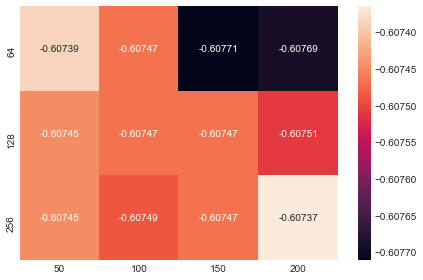

In [63]:
sns.heatmap(scores, annot=True, 
            xticklabels=params['epochs'], yticklabels=params['batch_size'], fmt=".5g")